## imports

### import packages

In [ ]:
#-*-coding:utf-8-*-

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import os

import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.set_style('whitegrid')

### import data

#### ohlcv_data

In [ ]:
zip_file_list = ['commodity.zip', 'currency.zip', 'ohlcv_data.zip', 'US_economy.zip']
for zip_file in zip_file_list:
  name = zip_file.split(".")[0]
  with ZipFile(zip_file, 'r') as zip:
    zip.extractall(f'{name}/')
  print('Done')

Done
Done
Done
Done


In [ ]:
# ohlcv 데이터 중 가장 시작 날짜가 늦은 게 무엇인지 알아보자
path = './ohlcv_data/'
ohlcv_file_list = os.listdir(path)
ohlcv_file_list = [file for file in ohlcv_file_list if file.endswith('.csv')]

In [ ]:
# 제일 늦은 것은 2016-03-03 Nikkey225
# 따라서 2016-03-03부터의 데이터를 사용하기로 한다.
# 또한 수익률을 측정해야하기 때문에 pct_change()를 사용해 수익률에 해댱하는 열을 만들어줘야한다.
for file in ohlcv_file_list:
  name = file.split('.')[0]
  df = pd.read_csv(f'ohlcv_data/{file}')
  start_date = df.Date[0]
  print(name, ": ", start_date)

TIGER단기선진하이일드(H) :  2014-03-24
TIGER코스닥150 :  2015-11-12
TIGER유로스탁스50(H) :  2014-04-30
KODEX인버스 :  2009-09-16
KODEX골드선물(H) :  2010-10-01
KODEX200 :  2002-10-14
KOSEF단기자금 :  2010-07-29
KOSEF미국달러선물 :  2011-02-24
TIGER원유선물(H) :  2010-08-02
TIGER미국SP500선물(H) :  2011-07-18
KOSEF국고채10년 :  2011-10-20
KBSTAR중기우량회사채 :  2011-04-15
TIGER차이나CSI300 :  2014-02-17
KOSEF미국달러선물인버스 :  2011-04-01
KINDEX일본Nikkey225(H) :  2016-03-03


In [ ]:
def import_ohlcv_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  df["Rate"] = df['Close'].pct_change()
  df.dropna(inplace=True)
  df['Rate'] = (np.exp(np.log(df["Rate"]+1).rolling(5).sum())-1).shift(-5)
  df.dropna(inplace=True)
  
  return df

In [ ]:
# 데이터 가져오기
KOSEF국고채10년 = import_ohlcv_data('2016-03-03', 'KOSEF국고채10년.csv')
TIGER원유선물 = import_ohlcv_data('2016-03-03', 'TIGER원유선물(H).csv')
KBSTAR중기우량회사채 = import_ohlcv_data('2016-03-03', 'KBSTAR중기우량회사채.csv')
KOSEF미국달러선물 = import_ohlcv_data('2016-03-03', 'KOSEF미국달러선물.csv')
TIGER차이나CSI300 = import_ohlcv_data('2016-03-03', 'TIGER차이나CSI300.csv')
KODEX200 = import_ohlcv_data('2016-03-03', 'KODEX200.csv')
KOSEF미국달러선물인버스 = import_ohlcv_data('2016-03-03', 'KOSEF미국달러선물인버스.csv')
KINDEX일본Nikkey225 = import_ohlcv_data('2016-03-03', 'KINDEX일본Nikkey225(H).csv')
KOSEF단기자금 = import_ohlcv_data('2016-03-03', 'KOSEF단기자금.csv')
TIGER유로스탁스50 = import_ohlcv_data('2016-03-03', 'TIGER유로스탁스50(H).csv')
KODEX골드선물 = import_ohlcv_data('2016-03-03', 'KODEX골드선물(H).csv')
TIGER미국SP500선물 = import_ohlcv_data('2016-03-03', 'TIGER미국SP500선물(H).csv')
TIGER코스닥150 = import_ohlcv_data('2016-03-03', 'TIGER코스닥150.csv')
TIGER단기선진하이일드 = import_ohlcv_data('2016-03-03', 'TIGER단기선진하이일드(H).csv')
KODEX인버스 = import_ohlcv_data('2016-03-03', 'KODEX인버스.csv')

In [ ]:
etf_list = [TIGER단기선진하이일드, TIGER코스닥150, TIGER유로스탁스50, KODEX인버스,
            KODEX골드선물, KODEX200, KOSEF단기자금, KOSEF미국달러선물, TIGER원유선물,
            TIGER미국SP500선물, KOSEF국고채10년, KBSTAR중기우량회사채, TIGER차이나CSI300,
            KOSEF미국달러선물인버스, KINDEX일본Nikkey225]
name_list = []
for file in ohlcv_file_list:
  name_list.append(file.split('.')[0])

close_dict = {}
for i in range(len(etf_list)):
  name = name_list[i] +'_Close'
  close_dict[name] = etf_list[i].Close

close_price = pd.DataFrame(close_dict)
close_price['Date'] = KODEX200.Date
close_price








,TIGER단기선진하이일드(H)_Close,TIGER코스닥150_Close,TIGER유로스탁스50(H)_Close,KODEX인버스_Close,KODEX골드선물(H)_Close,KODEX200_Close,KOSEF단기자금_Close,KOSEF미국달러선물_Close,TIGER원유선물(H)_Close,TIGER미국SP500선물(H)_Close,KOSEF국고채10년_Close,KBSTAR중기우량회사채_Close,TIGER차이나CSI300_Close,KOSEF미국달러선물인버스_Close,KINDEX일본Nikkey225(H)_Close,Date
1,9530,10413,9645,8250,9745,21245,93723,11972,3600,23275,110863,94041,6848,10410,10540,2016-03-04
2,9565,10360,9640,8230,9725,21288,93728,11928,3765,23290,110867,94201,6880,10430,10515,2016-03-07
3,9570,10368,9635,8295,9790,21137,93718,11981,3800,23265,111188,94201,6819,10385,10465,2016-03-08
4,9565,10432,9580,8260,9685,21232,93741,12098,3745,23215,111132,94069,6796,10300,10360,2016-03-09
5,9555,10489,9590,8200,9640,21424,93728,11967,3810,23255,111026,94243,6810,10415,10480,2016-03-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,11845,12155,12640,4525,12155,34470,101370,13460,5415,46930,111010,102500,9880,9295,17510,2022-05-16
1526,11830,12375,12750,4480,12310,34805,101365,13370,5630,47340,111010,102460,9925,9365,17600,2022-05-17
1527,11740,12545,12845,4470,12200,34870,101365,13275,5565,47930,110580,102405,9895,9430,17685,2022-05-18
1528,11755,12310,12575,4540,12200,34370,101360,13390,5460,46060,110775,102440,9905,9350,17220,2022-05-19


In [ ]:
etf_list = [TIGER단기선진하이일드, TIGER코스닥150, TIGER유로스탁스50, KODEX인버스,
            KODEX골드선물, KODEX200, KOSEF단기자금, KOSEF미국달러선물, TIGER원유선물,
            TIGER미국SP500선물, KOSEF국고채10년, KBSTAR중기우량회사채, TIGER차이나CSI300,
            KOSEF미국달러선물인버스, KINDEX일본Nikkey225]
name_list = []
for file in ohlcv_file_list:
  name_list.append(file.split('.')[0])

volume_dict = {}
for i in range(len(etf_list)):
  name = name_list[i] +'_Volume'
  volume_dict[name] = etf_list[i].Volume

volume = pd.DataFrame(volume_dict)
volume['Date'] = KODEX200.Date
volume



,TIGER단기선진하이일드(H)_Volume,TIGER코스닥150_Volume,TIGER유로스탁스50(H)_Volume,KODEX인버스_Volume,KODEX골드선물(H)_Volume,KODEX200_Volume,KOSEF단기자금_Volume,KOSEF미국달러선물_Volume,TIGER원유선물(H)_Volume,TIGER미국SP500선물(H)_Volume,KOSEF국고채10년_Volume,KBSTAR중기우량회사채_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물인버스_Volume,KINDEX일본Nikkey225(H)_Volume,Date
1,201,429737,3274,16488203,142158,7658963,402337,28062,2126369,20731,90,3,512798,11432,25,2016-03-04
2,384,422480,10172,9586362,67391,6940749,247118,56605,3942217,26105,98,82,490423,114302,308662,2016-03-07
3,2,421993,7420,16426298,126211,6926830,200878,25354,3438044,4126,14,0,507145,3178,336969,2016-03-08
4,2,436810,4272,12569213,47065,6053743,719311,10249,1870277,27461,779,104,484589,704,316169,2016-03-09
5,1,423083,5708,22581765,34029,9241212,165302,14659,1862786,10555,762,55,491465,1165,310932,2016-03-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,629,50771,8296,31463843,76237,7376786,6789,7015,140745,61586,7371,2768,20312,1524,257,2022-05-16
1526,123,46165,3937,24681484,102346,3999458,443,4016,553943,38381,8078,947,454648,2084,10,2022-05-17
1527,781,53459,11452,23430871,85996,6376438,1907,5961,416530,18090,20292,1789,65894,4739,166,2022-05-18
1528,1200,69981,8857,45601945,51917,6054919,1081,6566,1130996,62299,6886,249,462249,6765,103,2022-05-19


#### famma_french_daily_factor는 4/29 이후로 업데이트가 중단되어 사용하기가 어려울 것으로 보인다...

#### currency 

In [ ]:
Currency = pd.read_csv('currency/Currency.csv')
Currency = Currency[Currency.Date >= '2016-03-04'].reset_index(drop=True) # 시작하는 날짜보다 뒤에 있는 것만 가져오기

In [ ]:
currency_list = ['USD', 'JPY', 'CNY', 'EUR']  # 환율 마다 스케일이 다르기 때문에 환율의 변화율로 보는 것이 더 적합하다.
for currency in currency_list:                # 따라서 환율의 변화율을 변수로 설정해주도록 한다.
  col = currency + ' Change'
  Currency[col] = Currency[currency].pct_change()

Currency.drop(currency_list, axis=1, inplace=True)
Currency.fillna(0, inplace=True)

In [ ]:
Currency.head()

,Date,USD Change,JPY Change,CNY Change,EUR Change
0,2016-03-04,0.000000,0.000000,0.000000,0.000000
1,2016-03-07,0.001160,0.003778,-0.000217,0.002078
2,2016-03-08,0.008626,0.015867,0.010156,0.007431
3,2016-03-09,-0.000322,-0.007512,-0.001828,-0.000548
4,2016-03-10,-0.003645,-0.000544,-0.001885,0.013024


#### Commodity

In [ ]:
path = './commodity/'
commodity_file_list = os.listdir(path)
commodity_file_list = [file for file in commodity_file_list if file.endswith('.csv')]

In [ ]:
def import_commodity_data(start, file):
  file_path = f'commodity/{file}'  # 파일 불러오기
  name = file.split('.')[0]
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  df = df.iloc[:,:2]                                # Date를 뺀 가장 첫번째 열이 모두 가격을 나타내므로 이것만을 사용하기로 한다
  df.columns = ['Date', f'{name} Price']                    # 열 이름을 똑같이 변경
  return df

In [ ]:
gold = import_commodity_data('2016-03-04', 'gold.csv')
silver = import_commodity_data('2016-03-04', 'silver.csv')
natural_gas = import_commodity_data('2016-03-04', 'natural_gas.csv')
oil = import_commodity_data('2016-03-04', 'oil.csv')

In [ ]:
gold

,Date,gold Price
0,2016-03-04,1279.900024
1,2016-03-07,1272.300049
2,2016-03-08,1276.300049
3,2016-03-09,1260.000000
4,2016-03-10,1273.000000
...,...,...
1564,2022-05-23,1863.000000
1565,2022-05-24,1867.000000
1566,2022-05-25,1846.199951
1567,2022-05-26,1847.400024


#### US_economy

##### fed_rate

In [ ]:
fed_rate = pd.read_csv('US_economy/FED_rate.csv')

In [ ]:
fed_rate = fed_rate[fed_rate.Date >= "2016-03-04"].reset_index(drop=True)
fed_rate.fillna(method='ffill', inplace=True)
fed_rate.columns = ['Date', 'fed_rate']

In [ ]:
fed_rate.head()

,Date,fed_rate
0,2016-03-04,0.5
1,2016-03-07,0.5
2,2016-03-08,0.5
3,2016-03-09,0.5
4,2016-03-10,0.5


##### US_base_rate

In [ ]:
US_base_rate = pd.read_csv('US_economy/US_base_rate.csv')

In [ ]:
US_base_rate.Date = pd.date_range('2000-01-01', periods=268, freq='M')
US_base_rate = US_base_rate[US_base_rate.Date >= "2016-02-28"].reset_index(drop=True)
US_base_rate.head()

,Date,미국정책금리
0,2016-02-29,0.4
1,2016-03-31,0.4
2,2016-04-30,0.4
3,2016-05-31,0.4
4,2016-06-30,0.4


In [ ]:
date_df = pd.DataFrame(pd.to_datetime(fed_rate.Date))
date_df.head()

,Date
0,2016-03-04
1,2016-03-07
2,2016-03-08
3,2016-03-09
4,2016-03-10


In [ ]:
merged_df = pd.merge(US_base_rate, date_df, left_on='Date', right_on='Date', how='right')
merged_df.fillna(method='ffill', inplace=True)
merged_df.fillna(0.4, inplace=True)
merged_df

,Date,미국정책금리
0,2016-03-04,0.4
1,2016-03-07,0.4
2,2016-03-08,0.4
3,2016-03-09,0.4
4,2016-03-10,0.4
...,...,...
1612,2022-05-10,0.4
1613,2022-05-11,0.4
1614,2022-05-12,0.4
1615,2022-05-13,0.4


In [ ]:
merged_df.columns = ['Date', 'Base_rate']
US_base_rate = merged_df
US_base_rate.Date = fed_rate.Date
US_base_rate

,Date,Base_rate
0,2016-03-04,0.4
1,2016-03-07,0.4
2,2016-03-08,0.4
3,2016-03-09,0.4
4,2016-03-10,0.4
...,...,...
1612,2022-05-10,0.4
1613,2022-05-11,0.4
1614,2022-05-12,0.4
1615,2022-05-13,0.4


##### US_economic_growth_rate

In [ ]:
US_economic_growth_rate = pd.read_csv('US_economy/US_economic_growth_rate.csv')

In [ ]:
US_economic_growth_rate.Date = US_economic_growth_rate.Date.apply(lambda x: x + '-04')
US_economic_growth_rate = US_economic_growth_rate[US_economic_growth_rate.Date >= "2016-03-04"].reset_index(drop=True)
US_economic_growth_rate.Date = pd.to_datetime(US_economic_growth_rate.Date)

In [ ]:
US_economic_growth_rate.tail()

,Date,미국경제성장률
20,2021-03-04,1.5
21,2021-06-04,1.6
22,2021-09-04,0.6
23,2021-12-04,1.7
24,2022-03-04,-0.4


In [ ]:
merged_df = pd.merge(US_economic_growth_rate, date_df, left_on='Date', right_on='Date', how='right')
merged_df.fillna(method='ffill', inplace=True)
merged_df

,Date,미국경제성장률
0,2016-03-04,0.6
1,2016-03-07,0.6
2,2016-03-08,0.6
3,2016-03-09,0.6
4,2016-03-10,0.6
...,...,...
1612,2022-05-10,-0.4
1613,2022-05-11,-0.4
1614,2022-05-12,-0.4
1615,2022-05-13,-0.4


In [ ]:
merged_df.columns = ['Date', 'growth_rate']
US_economic_growth_rate = merged_df
US_economic_growth_rate.Date = fed_rate.Date
US_economic_growth_rate

,Date,growth_rate
0,2016-03-04,0.6
1,2016-03-07,0.6
2,2016-03-08,0.6
3,2016-03-09,0.6
4,2016-03-10,0.6
...,...,...
1612,2022-05-10,-0.4
1613,2022-05-11,-0.4
1614,2022-05-12,-0.4
1615,2022-05-13,-0.4


## Make Model

### preparation

In [ ]:
print(ohlcv_file_list)
print(commodity_file_list)
print(['Currency','fed_rate', 'US_economic_growth_rate', 'US_base_rate'])

['TIGER단기선진하이일드(H).csv', 'TIGER코스닥150.csv', 'TIGER유로스탁스50(H).csv', 'KODEX인버스.csv', 'KODEX골드선물(H).csv', 'KODEX200.csv', 'KOSEF단기자금.csv', 'KOSEF미국달러선물.csv', 'TIGER원유선물(H).csv', 'TIGER미국SP500선물(H).csv', 'KOSEF국고채10년.csv', 'KBSTAR중기우량회사채.csv', 'TIGER차이나CSI300.csv', 'KOSEF미국달러선물인버스.csv', 'KINDEX일본Nikkey225(H).csv']
['oil.csv', 'natural_gas.csv', 'silver.csv', 'gold.csv']
['Currency', 'fed_rate', 'US_economic_growth_rate', 'US_base_rate']


In [ ]:
ohlcv_list = [KOSEF국고채10년, 
 TIGER원유선물,
 KBSTAR중기우량회사채,
 KOSEF미국달러선물,
 TIGER차이나CSI300,
 KODEX200,
 KOSEF미국달러선물인버스,
 KINDEX일본Nikkey225,
 KOSEF단기자금,
 TIGER유로스탁스50,
 KODEX골드선물,
 TIGER미국SP500선물,
 TIGER코스닥150,
 TIGER단기선진하이일드,
 KODEX인버스]
commodity_list = [gold, natural_gas, oil, silver]
economy_list = [Currency, fed_rate, US_economic_growth_rate, US_base_rate]
total_feature_list = commodity_list  +economy_list+ [close_price]+[volume]

In [ ]:
def merge_data_set(dataset, feature_list):
  df = dataset
  for feature in feature_list:
    df = pd.merge(df, feature, how='left')
  df[['USD Change', 'JPY Change', 'CNY Change', 'EUR Change']] = df[['USD Change', 'JPY Change', 'CNY Change', 'EUR Change']].fillna(0)
  df = df.fillna(method='ffill')
  return df

### KODEX200

In [ ]:
feature_list = total_feature_list
KODEX200_combined = merge_data_set(KODEX200, feature_list)
KODEX200_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KODEX200_Volume,KOSEF단기자금_Volume,KOSEF미국달러선물_Volume,TIGER원유선물(H)_Volume,TIGER미국SP500선물(H)_Volume,KOSEF국고채10년_Volume,KBSTAR중기우량회사채_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물인버스_Volume,KINDEX일본Nikkey225(H)_Volume
1524,2022-05-16,34850,34925,34395,34470,7376786,0.018277,1813.500000,8.183,114.900002,...,7376786,6789,7015,140745,61586,7371,2768,20312,1524,257
1525,2022-05-17,34525,34850,34520,34805,3999458,-0.010200,1828.599976,8.372,115.559998,...,3999458,443,4016,553943,38381,8078,947,454648,2084,10
1526,2022-05-18,34990,35145,34770,34870,6376438,-0.007886,1819.699951,8.548,115.419998,...,6376438,1907,5961,416530,18090,20292,1789,65894,4739,166
1527,2022-05-19,34125,34450,34060,34370,6054919,0.003200,1841.199951,8.500,112.620003,...,6054919,1081,6566,1130996,62299,6886,249,462249,6765,103
1528,2022-05-20,34515,35025,34485,34985,4661990,-0.004002,1841.800049,8.189,114.040001,...,4661990,70569,2823,56571,83142,8418,412,578526,22242,8


In [ ]:
KODEX200_combined.drop(['Date', 'KODEX200_Close','KODEX200_Volume'], axis=1, inplace=True)

In [ ]:
X = KODEX200_combined.drop('Rate', axis=1)
y = KODEX200_combined[['Rate']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.32088686, -1.32918133, -1.3097103 , ...,  0.04167314,
         0.06356612, -0.29230411],
       [-1.31293658, -1.32241228, -1.29743037, ..., -0.01183564,
         1.69224254,  3.12517956],
       [-1.30758231, -1.32386279, -1.33017685, ...,  0.02815425,
        -0.06711431,  3.43861803],
       ...,
       [ 0.91233014,  0.90476487,  0.91410325, ..., -1.02707728,
        -0.04239997, -0.29074285],
       [ 0.77198338,  0.79275328,  0.79785324, ..., -0.07921247,
        -0.01032358, -0.29144043],
       [ 0.83526111,  0.88542474,  0.86743951, ...,  0.19885864,
         0.23471409, -0.29249235]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

1. 5일 동안의 column들을 반영시킬 수 있는 windowed_dataset을 만든다.  
2. shape가 (1516,5,66)인 데이터가 만들어지게 되는데, 이 때 5일 동안 column별 평균을 구한다.  
3. 2의 과정을 조금 더 쉽게 설명하면 5일 동안의 각 column별로 평균을 사용하여 5일 뒤의 수익률을 예측하는 것이다.  
4. 그렇지만 이렇게 되면 당연히 shape가 달라지게 된다. 이 점을 반영하여 X와 y모두 마지막 4개의 값을 사용하지 않도록 한다.

In [ ]:
def make_windowed_dataset(dataset,time_step):
  windowed_dataset = []
  for i in range(0,len(dataset)-time_step+1) :
    windowed_dataset.append(dataset[i:i+time_step])
  return np.array(windowed_dataset)

In [ ]:
X_scaled.shape

(1529, 44)

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 7)
X_scaled.shape

(1523, 7, 44)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1523, 44)

In [ ]:
# 끝에 4개의 데이터는 사용하지 못함
y = y.iloc[:-6].reset_index(drop=True)
y.shape

(1523, 1)

In [ ]:
# y = y[y.index%5 == 0].reset_index(drop=True)
# y.shape

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.02124872845971563
MAE: 0.016536331572631957
R2: -0.49739571137535976


No handles with labels found to put in legend.


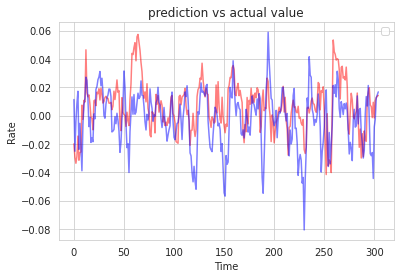

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### catboost(R2 값은 나쁘지만 RMSE와 MAE는 더 좋다)

In [ ]:
!pip install catboost -q

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
cat =CatBoostRegressor(silent=True)
cat.fit(X_train, y_train)

In [ ]:
pred = cat.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.020681538847285602
MAE: 0.01568594283659567
R2: -2.352989651268666


No handles with labels found to put in legend.


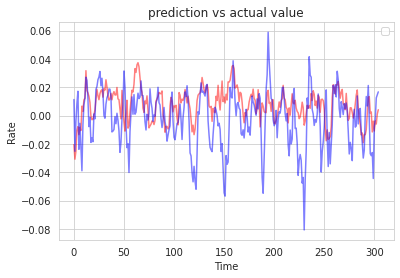

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### HP Tuning(전체적으로 비슷)

In [ ]:
!pip install optuna -q

In [ ]:
import optuna
from optuna import Trial,visualization
from optuna.samplers import TPESampler
from sklearn.model_selection import StratifiedKFold, KFold

In [ ]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
def objectiveLGB(trial:Trial) -> float:
  score_list = []
  params = {
    'random_state':42,
    'max_depth' : int(trial.suggest_discrete_uniform('max_depth',2, 16,2)),
    'n_estimators': int(trial.suggest_discrete_uniform('n_estimators',100,300,10)),
     'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.05),
     'subsample': trial.suggest_loguniform('subsample',0.7,1),
     'colsample_bytree':trial.suggest_loguniform('colsample_bytree',0.7,1)
     }
  for tr_idx, val_idx in kf.split(X_train, y_train):
    X_tr, X_val = np.array(X_train)[tr_idx], np.array(X_train)[val_idx]
    y_tr, y_val = np.array(y_train)[tr_idx], np.array(y_train)[val_idx]
    lgb = LGBMRegressor(**params)
    lgb = lgb.fit(X_tr, y_tr)
    score = mean_squared_error(lgb.predict(X_val), y_val)
    score_list.append(score)
  return np.mean(score_list)

In [ ]:
lgb_study = optuna.create_study(
    study_name = 'LGB_test',
    direction='minimize',
    sampler = TPESampler(seed=42)
)

[I 2022-05-29 07:37:52,224] A new study created in memory with name: LGB_test


In [ ]:
lgb_study.optimize(objectiveLGB, n_trials=30)
print("Best Score:", lgb_study.best_value)
print("Best trial:", lgb_study.best_trial.params)

[I 2022-05-29 07:38:15,005] Trial 0 finished with value: 0.0002970135089902509 and parameters: {'max_depth': 6.0, 'n_estimators': 290.0, 'learning_rate': 0.01752410111812814, 'subsample': 0.8666253978417815, 'colsample_bytree': 0.7400577878782706}. Best is trial 0 with value: 0.0002970135089902509.
[I 2022-05-29 07:38:24,523] Trial 1 finished with value: 0.0003594674631802921 and parameters: {'max_depth': 4.0, 'n_estimators': 110.0, 'learning_rate': 0.029621516588303493, 'subsample': 0.867385052013284, 'colsample_bytree': 0.9011142760532918}. Best is trial 0 with value: 0.0002970135089902509.
[I 2022-05-29 07:38:29,975] Trial 2 finished with value: 0.00035445692251607206 and parameters: {'max_depth': 2.0, 'n_estimators': 300.0, 'learning_rate': 0.025959425503112647, 'subsample': 0.7550744664467341, 'colsample_bytree': 0.746901073793237}. Best is trial 0 with value: 0.0002970135089902509.
[I 2022-05-29 07:38:37,867] Trial 3 finished with value: 0.0004501765448769497 and parameters: {'ma

Best Score: 0.0002346842177392602
Best trial: {'max_depth': 12.0, 'n_estimators': 260.0, 'learning_rate': 0.04063097295315241, 'subsample': 0.8960668408161936, 'colsample_bytree': 0.8599408856734483}


In [ ]:
lgbm_tuned = LGBMRegressor(max_depth=int(lgb_study.best_params['max_depth']), colsample_bytree=lgb_study.best_params['colsample_bytree'],
                    learning_rate=lgb_study.best_params['learning_rate'], n_estimators=int(lgb_study.best_params['n_estimators']),
                    subsample=lgb_study.best_params['subsample'], random_state=42)
lgbm_tuned.fit(X_train, y_train)

LGBMRegressor(colsample_bytree=0.8599408856734483,
              learning_rate=0.04063097295315241, max_depth=12, n_estimators=260,
              random_state=42, subsample=0.8960668408161936)

In [ ]:
pred = lgbm_tuned.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.022204198081391794
MAE: 0.017038252624169657
R2: -0.8659156390822227


No handles with labels found to put in legend.


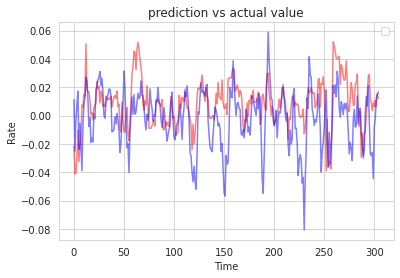

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

1. 5 영업일 만큼의 데이터가 필요하다.
2. 만약 5/30부터의 주간수익률을 예측하고 싶다면 5/23~5/27의 데이터가 필요하다.  
3. catboost로 예측한 결과와 lgbm_tuned로 예측한 결과를 모두 표시

In [ ]:
def predict_data(start, file):
  file_path = f'ohlcv_data/{file}'  # 파일 불러오기
  df = pd.read_csv(file_path)
  df = df[df.Date >= start].reset_index(drop=True)  # 시작하는 날짜보다 뒤에 있는 것만 가져오기
  #df["Rate"] = df['Close'].pct_change()
  #df.dropna(inplace=True)
  #df['Rate'] = (np.exp(np.log(df["Rate"]+1).rolling(5).sum())-1).shift(-5)
  #df.dropna(inplace=True)
  
  return df


KODEX200_predict = predict_data('2016-03-04', 'KODEX200.csv')
#KODEX200_predict.tail()
KODEX200_combined_predict = merge_data_set(KODEX200_predict, feature_list)
test=KODEX200_combined_predict.iloc[-7:]
test.drop(['Date', 'KODEX200_Close','KODEX200_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(7, 44)

In [ ]:
test=test.reshape(1,7,44)
test=test.mean(axis=1)
#print(test.shape)

pred_kodex200=lgbm_tuned.predict(test)
#i=list(KODEX200_combined_predict.index)[-7:]
pred_kodex200=pd.DataFrame(pred_kodex200)
pred_kodex200.to_csv('pred_kodex200.csv')

### KODEX 인버스

In [ ]:
feature_list = total_feature_list
KODEX인버스_combined = merge_data_set(KODEX인버스, feature_list)
KODEX인버스_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KODEX200_Volume,KOSEF단기자금_Volume,KOSEF미국달러선물_Volume,TIGER원유선물(H)_Volume,TIGER미국SP500선물(H)_Volume,KOSEF국고채10년_Volume,KBSTAR중기우량회사채_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물인버스_Volume,KINDEX일본Nikkey225(H)_Volume
1524,2022-05-16,4475,4540,4465,4525,31463843,-0.018785,1813.500000,8.183,114.900002,...,7376786,6789,7015,140745,61586,7371,2768,20312,1524,257
1525,2022-05-17,4515,4520,4475,4480,24681484,0.008929,1828.599976,8.372,115.559998,...,3999458,443,4016,553943,38381,8078,947,454648,2084,10
1526,2022-05-18,4455,4490,4435,4470,23430871,0.007830,1819.699951,8.548,115.419998,...,6376438,1907,5961,416530,18090,20292,1789,65894,4739,166
1527,2022-05-19,4575,4580,4525,4540,45601945,-0.004405,1841.199951,8.500,112.620003,...,6054919,1081,6566,1130996,62299,6886,249,462249,6765,103
1528,2022-05-20,4515,4525,4450,4450,51737673,0.004494,1841.800049,8.189,114.040001,...,4661990,70569,2823,56571,83142,8418,412,578526,22242,8


In [ ]:
KODEX인버스_combined.drop(['Date', 'KODEX인버스_Close','KODEX인버스_Volume'], axis=1, inplace=True)

In [ ]:
X = KODEX인버스_combined.drop('Rate', axis=1)
y = KODEX인버스_combined[['Rate']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.59443672,  1.56352906,  1.60373686, ...,  0.04167314,
         0.06356612, -0.29230411],
       [ 1.57207684,  1.54497096,  1.59251308, ..., -0.01183564,
         1.69224254,  3.12517956],
       [ 1.56462355,  1.59693364,  1.59625434, ...,  0.02815425,
        -0.06711431,  3.43861803],
       ...,
       [-1.24526776, -1.24245571, -1.23961879, ..., -1.02707728,
        -0.04239997, -0.29074285],
       [-1.15582824, -1.17564655, -1.17227616, ..., -0.07921247,
        -0.01032358, -0.29144043],
       [-1.200548  , -1.21647437, -1.22839502, ...,  0.19885864,
         0.23471409, -0.29249235]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

1. 5일 동안의 column들을 반영시킬 수 있는 windowed_dataset을 만든다.  
2. shape가 (1516,5,66)인 데이터가 만들어지게 되는데, 이 때 5일 동안 column별 평균을 구한다.  
3. 2의 과정을 조금 더 쉽게 설명하면 5일 동안의 각 column별로 평균을 사용하여 5일 뒤의 수익률을 예측하는 것이다.  
4. 그렇지만 이렇게 되면 당연히 shape가 달라지게 된다. 이 점을 반영하여 X와 y모두 마지막 4개의 값을 사용하지 않도록 한다.

In [ ]:
def make_windowed_dataset(dataset,time_step):
  windowed_dataset = []
  for i in range(0,len(dataset)-time_step+1) :
    windowed_dataset.append(dataset[i:i+time_step])
  return np.array(windowed_dataset)

In [ ]:
X_scaled.shape

(1529, 44)

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 7)
X_scaled.shape

(1523, 7, 44)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1523, 44)

In [ ]:
# 끝에 4개의 데이터는 사용하지 못함
y = y.iloc[:-6].reset_index(drop=True)
y.shape

(1523, 1)

In [ ]:
# y = y[y.index%5 == 0].reset_index(drop=True)
# y.shape

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.023210594086563546
MAE: 0.01804676259751831
R2: -0.649671747955026


No handles with labels found to put in legend.


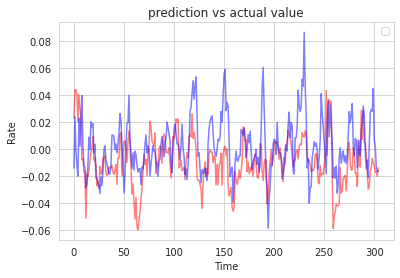

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### catboost(R2 값은 나쁘지만 RMSE와 MAE는 더 좋다)

In [ ]:
cat =CatBoostRegressor(silent=True)
cat.fit(X_train, y_train)

In [ ]:
pred = cat.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.021506020752299976
MAE: 0.016672680954935633
R2: -2.077379113292771


No handles with labels found to put in legend.


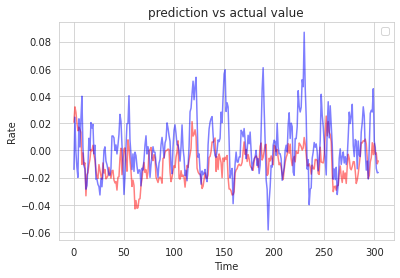

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### HP Tuning(전체적으로 비슷)

In [ ]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
def objectiveLGB(trial:Trial) -> float:
  score_list = []
  params = {
    'random_state':42,
    'max_depth' : int(trial.suggest_discrete_uniform('max_depth',2, 16,2)),
    'n_estimators': int(trial.suggest_discrete_uniform('n_estimators',100,300,10)),
     'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.05),
     'subsample': trial.suggest_loguniform('subsample',0.7,1),
     'colsample_bytree':trial.suggest_loguniform('colsample_bytree',0.7,1)
     }
  for tr_idx, val_idx in kf.split(X_train, y_train):
    X_tr, X_val = np.array(X_train)[tr_idx], np.array(X_train)[val_idx]
    y_tr, y_val = np.array(y_train)[tr_idx], np.array(y_train)[val_idx]
    lgb = LGBMRegressor(**params)
    lgb = lgb.fit(X_tr, y_tr)
    score = mean_squared_error(lgb.predict(X_val), y_val)
    score_list.append(score)
  return np.mean(score_list)

In [ ]:
lgb_study = optuna.create_study(
    study_name = 'LGB_test',
    direction='minimize',
    sampler = TPESampler(seed=42)
)

[I 2022-05-29 07:50:16,255] A new study created in memory with name: LGB_test


In [ ]:
lgb_study.optimize(objectiveLGB, n_trials=30)
print("Best Score:", lgb_study.best_value)
print("Best trial:", lgb_study.best_trial.params)

[I 2022-05-29 07:50:38,022] Trial 0 finished with value: 0.00031949141790001964 and parameters: {'max_depth': 6.0, 'n_estimators': 290.0, 'learning_rate': 0.01752410111812814, 'subsample': 0.8666253978417815, 'colsample_bytree': 0.7400577878782706}. Best is trial 0 with value: 0.00031949141790001964.
[I 2022-05-29 07:50:50,513] Trial 1 finished with value: 0.00038506954258223075 and parameters: {'max_depth': 4.0, 'n_estimators': 110.0, 'learning_rate': 0.029621516588303493, 'subsample': 0.867385052013284, 'colsample_bytree': 0.9011142760532918}. Best is trial 0 with value: 0.00031949141790001964.
[I 2022-05-29 07:50:55,636] Trial 2 finished with value: 0.0003703451312084262 and parameters: {'max_depth': 2.0, 'n_estimators': 300.0, 'learning_rate': 0.025959425503112647, 'subsample': 0.7550744664467341, 'colsample_bytree': 0.746901073793237}. Best is trial 0 with value: 0.00031949141790001964.
[I 2022-05-29 07:51:01,985] Trial 3 finished with value: 0.0004741938451972443 and parameters: 

Best Score: 0.0002554360364392203
Best trial: {'max_depth': 8.0, 'n_estimators': 240.0, 'learning_rate': 0.04936136705399827, 'subsample': 0.9269156675702644, 'colsample_bytree': 0.8813379449398991}


In [ ]:
lgbm_tuned = LGBMRegressor(max_depth=int(lgb_study.best_params['max_depth']), colsample_bytree=lgb_study.best_params['colsample_bytree'],
                    learning_rate=lgb_study.best_params['learning_rate'], n_estimators=int(lgb_study.best_params['n_estimators']),
                    subsample=lgb_study.best_params['subsample'], random_state=42)
lgbm_tuned.fit(X_train, y_train)

LGBMRegressor(colsample_bytree=0.8813379449398991,
              learning_rate=0.04936136705399827, max_depth=8, n_estimators=240,
              random_state=42, subsample=0.9269156675702644)

In [ ]:
pred = lgbm_tuned.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.02212406958019404
MAE: 0.016534279426897443
R2: -0.7729002307685342


No handles with labels found to put in legend.


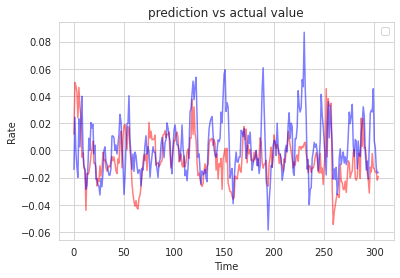

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

1. 5 영업일 만큼의 데이터가 필요하다.
2. 만약 5/30부터의 주간수익률을 예측하고 싶다면 5/23~5/27의 데이터가 필요하다.  
3. catboost로 예측한 결과와 lgbm_tuned로 예측한 결과를 모두 표시

In [ ]:


KODEX인버스_predict = predict_data('2016-03-04', 'KODEX인버스.csv')
#KODEX인버스_predict.tail()
KODEX인버스_combined_predict = merge_data_set(KODEX인버스_predict, feature_list)
test=KODEX인버스_combined_predict.iloc[-7:]
test.drop(['Date', 'KODEX인버스_Close','KODEX인버스_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(7, 44)

In [ ]:
test=test.reshape(1,7,44)
test=test.mean(axis=1)
#print(test.shape)

pred_kodex인버스=lgbm_tuned.predict(test)
#i=list(KODEX200_combined_predict.index)[-7:]
pred_kodex인버스=pd.DataFrame(pred_kodex인버스)
pred_kodex인버스.to_csv('pred_kodex인버스.csv')

### TIGER코스닥150

In [ ]:
feature_list = total_feature_list
TIGER코스닥150_combined = merge_data_set(TIGER코스닥150, feature_list)
TIGER코스닥150_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KODEX200_Volume,KOSEF단기자금_Volume,KOSEF미국달러선물_Volume,TIGER원유선물(H)_Volume,TIGER미국SP500선물(H)_Volume,KOSEF국고채10년_Volume,KBSTAR중기우량회사채_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물인버스_Volume,KINDEX일본Nikkey225(H)_Volume
1524,2022-05-16,12350,12380,12130,12155,50771,0.049774,1813.500000,8.183,114.900002,...,7376786,6789,7015,140745,61586,7371,2768,20312,1524,257
1525,2022-05-17,12295,12390,12110,12375,46165,0.002424,1828.599976,8.372,115.559998,...,3999458,443,4016,553943,38381,8078,947,454648,2084,10
1526,2022-05-18,12450,12570,12425,12545,53459,0.004384,1819.699951,8.548,115.419998,...,6376438,1907,5961,416530,18090,20292,1789,65894,4739,166
1527,2022-05-19,12130,12465,12130,12310,69981,0.019496,1841.199951,8.500,112.620003,...,6054919,1081,6566,1130996,62299,6886,249,462249,6765,103
1528,2022-05-20,12490,12725,12425,12715,76319,-0.011011,1841.800049,8.189,114.040001,...,4661990,70569,2823,56571,83142,8418,412,578526,22242,8


In [ ]:
TIGER코스닥150_combined.drop(['Date', 'TIGER코스닥150_Close','TIGER코스닥150_Volume'], axis=1, inplace=True)

In [ ]:
X = TIGER코스닥150_combined.drop('Rate', axis=1)
y = TIGER코스닥150_combined[['Rate']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.67889945, -0.70437314, -0.65966047, ...,  0.04167314,
         0.06356612, -0.29230411],
       [-0.65701875, -0.69222401, -0.66196604, ..., -0.01183564,
         1.69224254,  3.12517956],
       [-0.68710471, -0.72642156, -0.72191088, ...,  0.02815425,
        -0.06711431,  3.43861803],
       ...,
       [ 0.24556011,  0.24640869,  0.29438476, ..., -1.02707728,
        -0.04239997, -0.29074285],
       [ 0.09968878,  0.19916208,  0.15835608, ..., -0.07921247,
        -0.01032358, -0.29144043],
       [ 0.26379403,  0.31615369,  0.29438476, ...,  0.19885864,
         0.23471409, -0.29249235]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

1. 5일 동안의 column들을 반영시킬 수 있는 windowed_dataset을 만든다.  
2. shape가 (1516,5,66)인 데이터가 만들어지게 되는데, 이 때 5일 동안 column별 평균을 구한다.  
3. 2의 과정을 조금 더 쉽게 설명하면 5일 동안의 각 column별로 평균을 사용하여 5일 뒤의 수익률을 예측하는 것이다.  
4. 그렇지만 이렇게 되면 당연히 shape가 달라지게 된다. 이 점을 반영하여 X와 y모두 마지막 4개의 값을 사용하지 않도록 한다.

In [ ]:
X_scaled.shape

(1529, 44)

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 7)
X_scaled.shape

(1523, 7, 44)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1523, 44)

In [ ]:
# 끝에 4개의 데이터는 사용하지 못함
y = y.iloc[:-6].reset_index(drop=True)
y.shape

(1523, 1)

In [ ]:
# y = y[y.index%5 == 0].reset_index(drop=True)
# y.shape

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.03220241207798511
MAE: 0.025401918656331818
R2: -1.3584145199906188


No handles with labels found to put in legend.


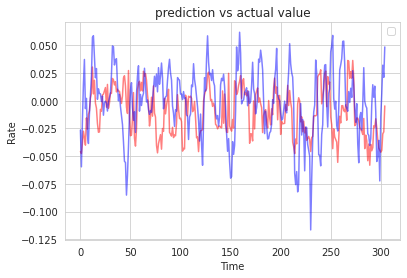

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### catboost(R2 값은 나쁘지만 RMSE와 MAE는 더 좋다)

In [ ]:
cat =CatBoostRegressor(silent=True)
cat.fit(X_train, y_train)

In [ ]:
pred = cat.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.03048453474127046
MAE: 0.02386317402175062
R2: -3.0119655466840625


No handles with labels found to put in legend.


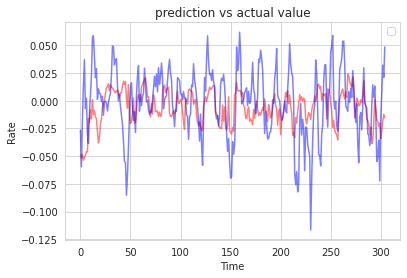

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### HP Tuning(전체적으로 비슷)

In [ ]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
def objectiveLGB(trial:Trial) -> float:
  score_list = []
  params = {
    'random_state':42,
    'max_depth' : int(trial.suggest_discrete_uniform('max_depth',2, 16,2)),
    'n_estimators': int(trial.suggest_discrete_uniform('n_estimators',100,300,10)),
     'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.05),
     'subsample': trial.suggest_loguniform('subsample',0.7,1),
     'colsample_bytree':trial.suggest_loguniform('colsample_bytree',0.7,1)
     }
  for tr_idx, val_idx in kf.split(X_train, y_train):
    X_tr, X_val = np.array(X_train)[tr_idx], np.array(X_train)[val_idx]
    y_tr, y_val = np.array(y_train)[tr_idx], np.array(y_train)[val_idx]
    lgb = LGBMRegressor(**params)
    lgb = lgb.fit(X_tr, y_tr)
    score = mean_squared_error(lgb.predict(X_val), y_val)
    score_list.append(score)
  return np.mean(score_list)

In [ ]:
lgb_study = optuna.create_study(
    study_name = 'LGB_test',
    direction='minimize',
    sampler = TPESampler(seed=42)
)

[I 2022-05-29 08:02:07,840] A new study created in memory with name: LGB_test


In [ ]:
lgb_study.optimize(objectiveLGB, n_trials=30)
print("Best Score:", lgb_study.best_value)
print("Best trial:", lgb_study.best_trial.params)

[I 2022-05-29 08:02:16,353] Trial 0 finished with value: 0.0006668412290781383 and parameters: {'max_depth': 6.0, 'n_estimators': 290.0, 'learning_rate': 0.01752410111812814, 'subsample': 0.8666253978417815, 'colsample_bytree': 0.7400577878782706}. Best is trial 0 with value: 0.0006668412290781383.
[I 2022-05-29 08:02:18,653] Trial 1 finished with value: 0.0008251493821386005 and parameters: {'max_depth': 4.0, 'n_estimators': 110.0, 'learning_rate': 0.029621516588303493, 'subsample': 0.867385052013284, 'colsample_bytree': 0.9011142760532918}. Best is trial 0 with value: 0.0006668412290781383.
[I 2022-05-29 08:02:20,455] Trial 2 finished with value: 0.000872002906557713 and parameters: {'max_depth': 2.0, 'n_estimators': 300.0, 'learning_rate': 0.025959425503112647, 'subsample': 0.7550744664467341, 'colsample_bytree': 0.746901073793237}. Best is trial 0 with value: 0.0006668412290781383.
[I 2022-05-29 08:02:23,200] Trial 3 finished with value: 0.000986510191383258 and parameters: {'max_d

Best Score: 0.000560551011314108
Best trial: {'max_depth': 12.0, 'n_estimators': 220.0, 'learning_rate': 0.040640438074571204, 'subsample': 0.9039498763683759, 'colsample_bytree': 0.9289484209691279}


In [ ]:
lgbm_tuned = LGBMRegressor(max_depth=int(lgb_study.best_params['max_depth']), colsample_bytree=lgb_study.best_params['colsample_bytree'],
                    learning_rate=lgb_study.best_params['learning_rate'], n_estimators=int(lgb_study.best_params['n_estimators']),
                    subsample=lgb_study.best_params['subsample'], random_state=42)
lgbm_tuned.fit(X_train, y_train)

LGBMRegressor(colsample_bytree=0.9289484209691279,
              learning_rate=0.040640438074571204, max_depth=12,
              n_estimators=220, random_state=42, subsample=0.9039498763683759)

In [ ]:
pred = lgbm_tuned.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.030548642691456452
MAE: 0.02401909192938826
R2: -2.036249680891322


No handles with labels found to put in legend.


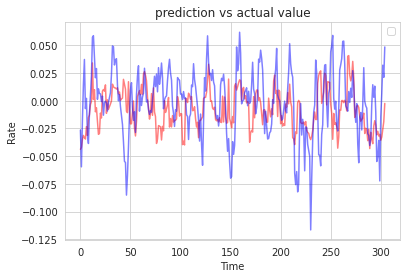

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

1. 5 영업일 만큼의 데이터가 필요하다.
2. 만약 5/30부터의 주간수익률을 예측하고 싶다면 5/23~5/27의 데이터가 필요하다.  
3. catboost로 예측한 결과와 lgbm_tuned로 예측한 결과를 모두 표시

In [ ]:


TIGER코스닥150_predict = predict_data('2016-03-04', 'TIGER코스닥150.csv')
#TIGER코스닥150_predict.tail()
TIGER코스닥150_combined_predict = merge_data_set(TIGER코스닥150_predict, feature_list)
test=TIGER코스닥150_combined_predict.iloc[-7:]
test.drop(['Date', 'TIGER코스닥150_Close','TIGER코스닥150_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(7, 44)

In [ ]:
test=test.reshape(1,7,44)
test=test.mean(axis=1)
#print(test.shape)

TIGER코스닥150=lgbm_tuned.predict(test)
#i=list(KODEX200_combined_predict.index)[-7:]
TIGER코스닥150=pd.DataFrame(TIGER코스닥150)
TIGER코스닥150.to_csv('TIGER코스닥150.csv')

### KINDEX일본Nikkey225

In [ ]:
feature_list = total_feature_list
KINDEX일본Nikkey225_combined = merge_data_set(KINDEX일본Nikkey225, feature_list)
KINDEX일본Nikkey225_combined.tail()

,Date,Open,High,Low,Close,Volume,Rate,gold Price,natural_gas Price,oil Price,...,KODEX200_Volume,KOSEF단기자금_Volume,KOSEF미국달러선물_Volume,TIGER원유선물(H)_Volume,TIGER미국SP500선물(H)_Volume,KOSEF국고채10년_Volume,KBSTAR중기우량회사채_Volume,TIGER차이나CSI300_Volume,KOSEF미국달러선물인버스_Volume,KINDEX일본Nikkey225(H)_Volume
1524,2022-05-16,17630,17650,17435,17510,257,0.019417,1813.500000,8.183,114.900002,...,7376786,6789,7015,140745,61586,7371,2768,20312,1524,257
1525,2022-05-17,17600,17600,17600,17600,10,0.001705,1828.599976,8.372,115.559998,...,3999458,443,4016,553943,38381,8078,947,454648,2084,10
1526,2022-05-18,17785,17825,17615,17685,166,-0.003675,1819.699951,8.548,115.419998,...,6376438,1907,5961,416530,18090,20292,1789,65894,4739,166
1527,2022-05-19,17280,17455,17220,17220,103,0.020906,1841.199951,8.500,112.620003,...,6054919,1081,6566,1130996,62299,6886,249,462249,6765,103
1528,2022-05-20,17490,17675,17490,17675,8,0.001697,1841.800049,8.189,114.040001,...,4661990,70569,2823,56571,83142,8418,412,578526,22242,8


In [ ]:
KINDEX일본Nikkey225_combined.drop(['Date', 'KINDEX일본Nikkey225(H)_Close','KINDEX일본Nikkey225(H)_Volume'], axis=1, inplace=True)

In [ ]:
X = KINDEX일본Nikkey225_combined.drop('Rate', axis=1)
y = KINDEX일본Nikkey225_combined[['Rate']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.49726836, -1.51671648, -1.46341375, ..., -0.22551528,
         0.04167314,  0.06356612],
       [-1.49540864, -1.51856735, -1.4914073 , ..., -0.22018446,
        -0.01183564,  1.69224254],
       [-1.50284754, -1.52597083, -1.54366192, ..., -0.22571772,
         0.02815425, -0.06711431],
       ...,
       [ 1.19747315,  1.17629818,  1.17731079, ..., -0.10499825,
        -1.02707728, -0.04239997],
       [ 1.00964093,  1.03933386,  1.02987812, ..., -0.20891551,
        -0.07921247, -0.01032358],
       [ 1.08774938,  1.12077211,  1.13065488, ..., -0.19791648,
         0.19885864,  0.23471409]])

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

1. 5일 동안의 column들을 반영시킬 수 있는 windowed_dataset을 만든다.  
2. shape가 (1516,5,66)인 데이터가 만들어지게 되는데, 이 때 5일 동안 column별 평균을 구한다.  
3. 2의 과정을 조금 더 쉽게 설명하면 5일 동안의 각 column별로 평균을 사용하여 5일 뒤의 수익률을 예측하는 것이다.  
4. 그렇지만 이렇게 되면 당연히 shape가 달라지게 된다. 이 점을 반영하여 X와 y모두 마지막 4개의 값을 사용하지 않도록 한다.

In [ ]:
X_scaled.shape

(1529, 44)

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 7)
X_scaled.shape

(1523, 7, 44)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1523, 44)

In [ ]:
# 끝에 4개의 데이터는 사용하지 못함
y = y.iloc[:-6].reset_index(drop=True)
y.shape

(1523, 1)

In [ ]:
# y = y[y.index%5 == 0].reset_index(drop=True)
# y.shape

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.028107102972252624
MAE: 0.022064684827795004
R2: -3.4508921857622


No handles with labels found to put in legend.


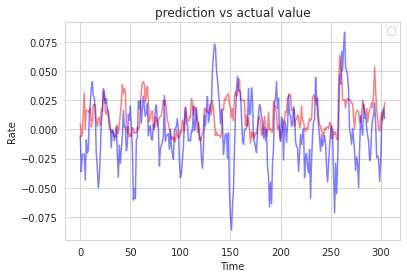

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### catboost(R2 값은 나쁘지만 RMSE와 MAE는 더 좋다)

In [ ]:
cat =CatBoostRegressor(silent=True)
cat.fit(X_train, y_train)

In [ ]:
pred = cat.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.02518014672287667
MAE: 0.01941783128915002
R2: -5.175214393545268


No handles with labels found to put in legend.


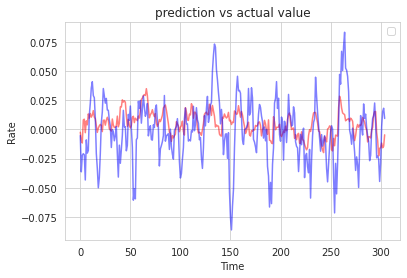

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### HP Tuning(전체적으로 비슷)

In [ ]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
def objectiveLGB(trial:Trial) -> float:
  score_list = []
  params = {
    'random_state':42,
    'max_depth' : int(trial.suggest_discrete_uniform('max_depth',2, 16,2)),
    'n_estimators': int(trial.suggest_discrete_uniform('n_estimators',100,300,10)),
     'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.05),
     'subsample': trial.suggest_loguniform('subsample',0.7,1),
     'colsample_bytree':trial.suggest_loguniform('colsample_bytree',0.7,1)
     }
  for tr_idx, val_idx in kf.split(X_train, y_train):
    X_tr, X_val = np.array(X_train)[tr_idx], np.array(X_train)[val_idx]
    y_tr, y_val = np.array(y_train)[tr_idx], np.array(y_train)[val_idx]
    lgb = LGBMRegressor(**params)
    lgb = lgb.fit(X_tr, y_tr)
    score = mean_squared_error(lgb.predict(X_val), y_val)
    score_list.append(score)
  return np.mean(score_list)

In [ ]:
lgb_study = optuna.create_study(
    study_name = 'LGB_test',
    direction='minimize',
    sampler = TPESampler(seed=42)
)

[I 2022-05-29 08:12:43,889] A new study created in memory with name: LGB_test


In [ ]:
lgb_study.optimize(objectiveLGB, n_trials=30)
print("Best Score:", lgb_study.best_value)
print("Best trial:", lgb_study.best_trial.params)

[I 2022-05-29 08:12:50,377] Trial 0 finished with value: 0.0003748907088360517 and parameters: {'max_depth': 6.0, 'n_estimators': 290.0, 'learning_rate': 0.01752410111812814, 'subsample': 0.8666253978417815, 'colsample_bytree': 0.7400577878782706}. Best is trial 0 with value: 0.0003748907088360517.
[I 2022-05-29 08:12:52,233] Trial 1 finished with value: 0.0004486635412098782 and parameters: {'max_depth': 4.0, 'n_estimators': 110.0, 'learning_rate': 0.029621516588303493, 'subsample': 0.867385052013284, 'colsample_bytree': 0.9011142760532918}. Best is trial 0 with value: 0.0003748907088360517.
[I 2022-05-29 08:12:53,978] Trial 2 finished with value: 0.00045264405659155066 and parameters: {'max_depth': 2.0, 'n_estimators': 300.0, 'learning_rate': 0.025959425503112647, 'subsample': 0.7550744664467341, 'colsample_bytree': 0.746901073793237}. Best is trial 0 with value: 0.0003748907088360517.
[I 2022-05-29 08:12:58,665] Trial 3 finished with value: 0.0005379303030547502 and parameters: {'ma

Best Score: 0.00028915520491001775
Best trial: {'max_depth': 12.0, 'n_estimators': 270.0, 'learning_rate': 0.04081726867630396, 'subsample': 0.9018372336153604, 'colsample_bytree': 0.8558694232990288}


In [ ]:
lgbm_tuned = LGBMRegressor(max_depth=int(lgb_study.best_params['max_depth']), colsample_bytree=lgb_study.best_params['colsample_bytree'],
                    learning_rate=lgb_study.best_params['learning_rate'], n_estimators=int(lgb_study.best_params['n_estimators']),
                    subsample=lgb_study.best_params['subsample'], random_state=42)
lgbm_tuned.fit(X_train, y_train)

LGBMRegressor(colsample_bytree=0.8558694232990288,
              learning_rate=0.04081726867630396, max_depth=12, n_estimators=270,
              random_state=42, subsample=0.9018372336153604)

In [ ]:
pred = lgbm_tuned.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.028399814791233578
MAE: 0.02227184675570683
R2: -4.424507731387407


No handles with labels found to put in legend.


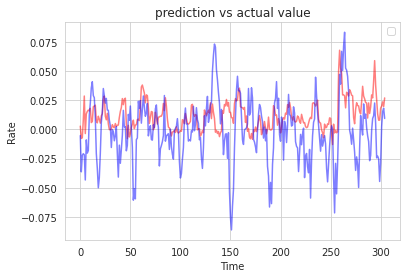

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

1. 5 영업일 만큼의 데이터가 필요하다.
2. 만약 5/30부터의 주간수익률을 예측하고 싶다면 5/23~5/27의 데이터가 필요하다.  
3. catboost로 예측한 결과와 lgbm_tuned로 예측한 결과를 모두 표시

In [ ]:


KINDEX일본Nikkey225_predict = predict_data('2016-03-04', 'KINDEX일본Nikkey225(H).csv')
#KINDEX일본Nikkey225_predict.tail()
KINDEX일본Nikkey225_combined_predict = merge_data_set(KINDEX일본Nikkey225_predict, feature_list)
test=KINDEX일본Nikkey225_combined_predict.iloc[-7:]
test.drop(['Date', 'KINDEX일본Nikkey225(H)_Close','KINDEX일본Nikkey225(H)_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

(7, 44)

In [ ]:
test=test.reshape(1,7,44)
test=test.mean(axis=1)
#print(test.shape)

KINDEX일본Nikkey225=lgbm_tuned.predict(test)
#i=list(KODEX200_combined_predict.index)[-7:]
pred_KINDEX일본Nikkey225=pd.DataFrame(KINDEX일본Nikkey225)
pred_KINDEX일본Nikkey225.to_csv('KINDEX일본Nikkey225(H).csv')

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

1. 5일 동안의 column들을 반영시킬 수 있는 windowed_dataset을 만든다.  
2. shape가 (1516,5,66)인 데이터가 만들어지게 되는데, 이 때 5일 동안 column별 평균을 구한다.  
3. 2의 과정을 조금 더 쉽게 설명하면 5일 동안의 각 column별로 평균을 사용하여 5일 뒤의 수익률을 예측하는 것이다.  
4. 그렇지만 이렇게 되면 당연히 shape가 달라지게 된다. 이 점을 반영하여 X와 y모두 마지막 4개의 값을 사용하지 않도록 한다.

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 5)
X_scaled.shape

(1525, 5, 45)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1525, 45)

In [ ]:
# 끝에 4개의 데이터는 사용하지 못함
y = y.iloc[:-4].reset_index(drop=True)
y.shape

(1525, 1)

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.023355051388749905
MAE: 0.01745210600052249
R2: -2.5298527147203425


No handles with labels found to put in legend.


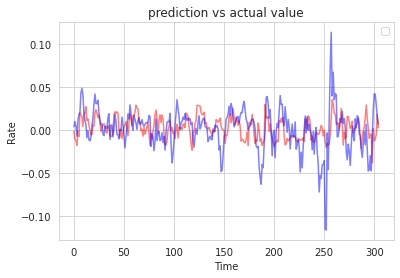

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### catboost(R2 값은 나쁘지만 RMSE와 MAE는 더 좋다)

In [ ]:
cat =CatBoostRegressor(silent=True)
cat.fit(X_train, y_train)

In [ ]:
pred = cat.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.02374881484862967
MAE: 0.017164318067209836
R2: -3.58662197881488


No handles with labels found to put in legend.


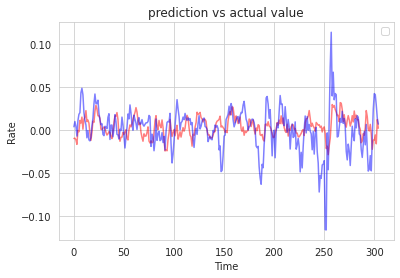

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### HP Tuning(전체적으로 비슷)

In [ ]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
def objectiveLGB(trial:Trial) -> float:
  score_list = []
  params = {
    'random_state':42,
    'max_depth' : int(trial.suggest_discrete_uniform('max_depth',2, 16,2)),
    'n_estimators': int(trial.suggest_discrete_uniform('n_estimators',100,300,10)),
     'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.05),
     'subsample': trial.suggest_loguniform('subsample',0.7,1),
     'colsample_bytree':trial.suggest_loguniform('colsample_bytree',0.7,1)
     }
  for tr_idx, val_idx in kf.split(X_train, y_train):
    X_tr, X_val = np.array(X_train)[tr_idx], np.array(X_train)[val_idx]
    y_tr, y_val = np.array(y_train)[tr_idx], np.array(y_train)[val_idx]
    lgb = LGBMRegressor(**params)
    lgb = lgb.fit(X_tr, y_tr)
    score = mean_squared_error(lgb.predict(X_val), y_val)
    score_list.append(score)
  return np.mean(score_list)

In [ ]:
lgb_study = optuna.create_study(
    study_name = 'LGB_test',
    direction='minimize',
    sampler = TPESampler(seed=42)
)

[I 2022-05-29 08:21:18,223] A new study created in memory with name: LGB_test


In [ ]:
lgb_study.optimize(objectiveLGB, n_trials=30)
print("Best Score:", lgb_study.best_value)
print("Best trial:", lgb_study.best_trial.params)

[I 2022-05-29 08:21:24,415] Trial 0 finished with value: 0.00035535698467950685 and parameters: {'max_depth': 6.0, 'n_estimators': 290.0, 'learning_rate': 0.01752410111812814, 'subsample': 0.8666253978417815, 'colsample_bytree': 0.7400577878782706}. Best is trial 0 with value: 0.00035535698467950685.
[I 2022-05-29 08:21:26,090] Trial 1 finished with value: 0.0004298441514737127 and parameters: {'max_depth': 4.0, 'n_estimators': 110.0, 'learning_rate': 0.029621516588303493, 'subsample': 0.867385052013284, 'colsample_bytree': 0.9011142760532918}. Best is trial 0 with value: 0.00035535698467950685.
[I 2022-05-29 08:21:27,819] Trial 2 finished with value: 0.00042496028556648403 and parameters: {'max_depth': 2.0, 'n_estimators': 300.0, 'learning_rate': 0.025959425503112647, 'subsample': 0.7550744664467341, 'colsample_bytree': 0.746901073793237}. Best is trial 0 with value: 0.00035535698467950685.
[I 2022-05-29 08:21:30,193] Trial 3 finished with value: 0.0005536292174397985 and parameters: 

In [ ]:
lgbm_tuned = LGBMRegressor(max_depth=int(lgb_study.best_params['max_depth']), colsample_bytree=lgb_study.best_params['colsample_bytree'],
                    learning_rate=lgb_study.best_params['learning_rate'], n_estimators=int(lgb_study.best_params['n_estimators']),
                    subsample=lgb_study.best_params['subsample'], random_state=42)
lgbm_tuned.fit(X_train, y_train)

In [ ]:
pred = lgbm_tuned.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

1. 5 영업일 만큼의 데이터가 필요하다.
2. 만약 5/30부터의 주간수익률을 예측하고 싶다면 5/23~5/27의 데이터가 필요하다.  
3. catboost로 예측한 결과와 lgbm_tuned로 예측한 결과를 모두 표시

### TIGER차이나CSI300

In [ ]:
feature_list = total_feature_list
TIGER차이나CSI300_combined = merge_data_set(TIGER차이나CSI300, feature_list)
TIGER차이나CSI300_combined.tail()

In [ ]:
TIGER차이나CSI300_combined.drop(['Date', 'TIGER차이나CSI300_Close','TIGER차이나CSI300_Volume'], axis=1, inplace=True)

In [ ]:
X =TIGER차이나CSI300_combined.drop('Rate', axis=1)
y =TIGER차이나CSI300_combined[['Rate']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

1. 5일 동안의 column들을 반영시킬 수 있는 windowed_dataset을 만든다.  
2. shape가 (1516,5,66)인 데이터가 만들어지게 되는데, 이 때 5일 동안 column별 평균을 구한다.  
3. 2의 과정을 조금 더 쉽게 설명하면 5일 동안의 각 column별로 평균을 사용하여 5일 뒤의 수익률을 예측하는 것이다.  
4. 그렇지만 이렇게 되면 당연히 shape가 달라지게 된다. 이 점을 반영하여 X와 y모두 마지막 4개의 값을 사용하지 않도록 한다.

In [ ]:
X_scaled.shape

(1529, 44)

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 7)
X_scaled.shape

(1523, 7, 44)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1523, 44)

In [ ]:
# 끝에 4개의 데이터는 사용하지 못함
y = y.iloc[:-6].reset_index(drop=True)
y.shape

(1523, 1)

In [ ]:
# y = y[y.index%5 == 0].reset_index(drop=True)
# y.shape

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.023210594086563546
MAE: 0.01804676259751831
R2: -0.649671747955026


No handles with labels found to put in legend.


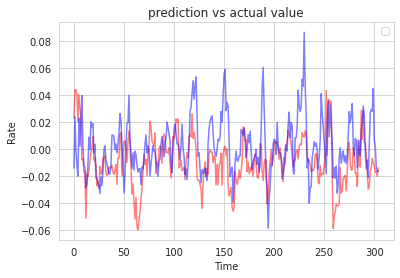

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### catboost(R2 값은 나쁘지만 RMSE와 MAE는 더 좋다)

In [ ]:
cat =CatBoostRegressor(silent=True)
cat.fit(X_train, y_train)

In [ ]:
pred = cat.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.021506020752299976
MAE: 0.016672680954935633
R2: -2.077379113292771


No handles with labels found to put in legend.


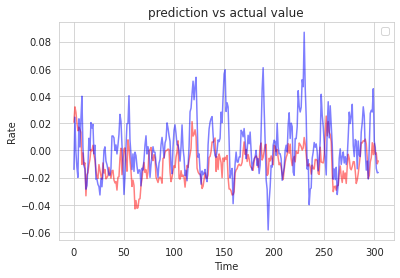

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### HP Tuning(전체적으로 비슷)

In [ ]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
def objectiveLGB(trial:Trial) -> float:
  score_list = []
  params = {
    'random_state':42,
    'max_depth' : int(trial.suggest_discrete_uniform('max_depth',2, 16,2)),
    'n_estimators': int(trial.suggest_discrete_uniform('n_estimators',100,300,10)),
     'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.05),
     'subsample': trial.suggest_loguniform('subsample',0.7,1),
     'colsample_bytree':trial.suggest_loguniform('colsample_bytree',0.7,1)
     }
  for tr_idx, val_idx in kf.split(X_train, y_train):
    X_tr, X_val = np.array(X_train)[tr_idx], np.array(X_train)[val_idx]
    y_tr, y_val = np.array(y_train)[tr_idx], np.array(y_train)[val_idx]
    lgb = LGBMRegressor(**params)
    lgb = lgb.fit(X_tr, y_tr)
    score = mean_squared_error(lgb.predict(X_val), y_val)
    score_list.append(score)
  return np.mean(score_list)

In [ ]:
lgb_study = optuna.create_study(
    study_name = 'LGB_test',
    direction='minimize',
    sampler = TPESampler(seed=42)
)

[I 2022-05-29 07:50:16,255] A new study created in memory with name: LGB_test


In [ ]:
lgb_study.optimize(objectiveLGB, n_trials=30)
print("Best Score:", lgb_study.best_value)
print("Best trial:", lgb_study.best_trial.params)

[I 2022-05-29 07:50:38,022] Trial 0 finished with value: 0.00031949141790001964 and parameters: {'max_depth': 6.0, 'n_estimators': 290.0, 'learning_rate': 0.01752410111812814, 'subsample': 0.8666253978417815, 'colsample_bytree': 0.7400577878782706}. Best is trial 0 with value: 0.00031949141790001964.
[I 2022-05-29 07:50:50,513] Trial 1 finished with value: 0.00038506954258223075 and parameters: {'max_depth': 4.0, 'n_estimators': 110.0, 'learning_rate': 0.029621516588303493, 'subsample': 0.867385052013284, 'colsample_bytree': 0.9011142760532918}. Best is trial 0 with value: 0.00031949141790001964.
[I 2022-05-29 07:50:55,636] Trial 2 finished with value: 0.0003703451312084262 and parameters: {'max_depth': 2.0, 'n_estimators': 300.0, 'learning_rate': 0.025959425503112647, 'subsample': 0.7550744664467341, 'colsample_bytree': 0.746901073793237}. Best is trial 0 with value: 0.00031949141790001964.
[I 2022-05-29 07:51:01,985] Trial 3 finished with value: 0.0004741938451972443 and parameters: 

In [ ]:
lgbm_tuned = LGBMRegressor(max_depth=int(lgb_study.best_params['max_depth']), colsample_bytree=lgb_study.best_params['colsample_bytree'],
                    learning_rate=lgb_study.best_params['learning_rate'], n_estimators=int(lgb_study.best_params['n_estimators']),
                    subsample=lgb_study.best_params['subsample'], random_state=42)
lgbm_tuned.fit(X_train, y_train)

In [ ]:
pred = lgbm_tuned.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

1. 5 영업일 만큼의 데이터가 필요하다.
2. 만약 5/30부터의 주간수익률을 예측하고 싶다면 5/23~5/27의 데이터가 필요하다.  
3. catboost로 예측한 결과와 lgbm_tuned로 예측한 결과를 모두 표시

In [ ]:


TIGER차이나CSI300_predict = predict_data('2016-03-04', 'TIGER차이나CSI300.csv')
#TIGER차이나CSI300_predict.tail()
TIGER차이나CSI300_combined_predict = merge_data_set(TIGER차이나CSI300_predict, feature_list)
test=TIGER차이나CSI300_combined_predict.iloc[-7:]
test.drop(['Date', 'TIGER차이나CSI300_Close','TIGER차이나CSI300_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

In [ ]:
test=test.reshape(1,7,44)
test=test.mean(axis=1)
#print(test.shape)

TIGER차이나CSI300=lgbm_tuned.predict(test)
#i=list(KODEX200_combined_predict.index)[-7:]
TIGER차이나CSI300=pd.DataFrame(TIGER차이나CSI300)
TIGER차이나CSI300.to_csv('TIGER차이나CSI300.csv')

### TIGER유로스톡스50

In [ ]:
feature_list = total_feature_list
TIGER유로스톡스50_combined = merge_data_set(TIGER유로스톡스50, feature_list)
TIGER유로스톡스50_combined.tail()

In [ ]:
TIGER유로스톡스50_combined.drop(['Date', 'TIGER유로스톡스50(H)_Close','TIGER유로스톡스50(H)_Volume'], axis=1, inplace=True)

In [ ]:
X =TIGER유로스톡스50_combined.drop('Rate', axis=1)
y =TIGER유로스톡스50_combined[['Rate']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

1. 5일 동안의 column들을 반영시킬 수 있는 windowed_dataset을 만든다.  
2. shape가 (1516,5,66)인 데이터가 만들어지게 되는데, 이 때 5일 동안 column별 평균을 구한다.  
3. 2의 과정을 조금 더 쉽게 설명하면 5일 동안의 각 column별로 평균을 사용하여 5일 뒤의 수익률을 예측하는 것이다.  
4. 그렇지만 이렇게 되면 당연히 shape가 달라지게 된다. 이 점을 반영하여 X와 y모두 마지막 4개의 값을 사용하지 않도록 한다.

In [ ]:
X_scaled.shape

(1529, 44)

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 7)
X_scaled.shape

(1523, 7, 44)

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

(1523, 44)

In [ ]:
# 끝에 4개의 데이터는 사용하지 못함
y = y.iloc[:-6].reset_index(drop=True)
y.shape

(1523, 1)

In [ ]:
# y = y[y.index%5 == 0].reset_index(drop=True)
# y.shape

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.023210594086563546
MAE: 0.01804676259751831
R2: -0.649671747955026


No handles with labels found to put in legend.


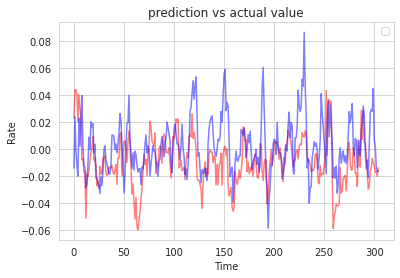

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### catboost(R2 값은 나쁘지만 RMSE와 MAE는 더 좋다)

In [ ]:
cat =CatBoostRegressor(silent=True)
cat.fit(X_train, y_train)

In [ ]:
pred = cat.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

RMSE: 0.021506020752299976
MAE: 0.016672680954935633
R2: -2.077379113292771


No handles with labels found to put in legend.


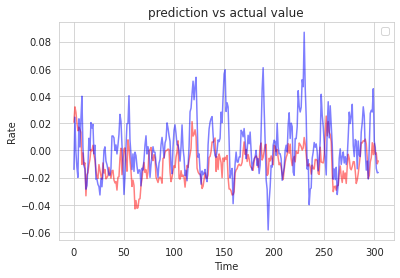

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### HP Tuning(전체적으로 비슷)

In [ ]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
def objectiveLGB(trial:Trial) -> float:
  score_list = []
  params = {
    'random_state':42,
    'max_depth' : int(trial.suggest_discrete_uniform('max_depth',2, 16,2)),
    'n_estimators': int(trial.suggest_discrete_uniform('n_estimators',100,300,10)),
     'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.05),
     'subsample': trial.suggest_loguniform('subsample',0.7,1),
     'colsample_bytree':trial.suggest_loguniform('colsample_bytree',0.7,1)
     }
  for tr_idx, val_idx in kf.split(X_train, y_train):
    X_tr, X_val = np.array(X_train)[tr_idx], np.array(X_train)[val_idx]
    y_tr, y_val = np.array(y_train)[tr_idx], np.array(y_train)[val_idx]
    lgb = LGBMRegressor(**params)
    lgb = lgb.fit(X_tr, y_tr)
    score = mean_squared_error(lgb.predict(X_val), y_val)
    score_list.append(score)
  return np.mean(score_list)

In [ ]:
lgb_study = optuna.create_study(
    study_name = 'LGB_test',
    direction='minimize',
    sampler = TPESampler(seed=42)
)

[I 2022-05-29 07:50:16,255] A new study created in memory with name: LGB_test


In [ ]:
lgb_study.optimize(objectiveLGB, n_trials=30)
print("Best Score:", lgb_study.best_value)
print("Best trial:", lgb_study.best_trial.params)

[I 2022-05-29 07:50:38,022] Trial 0 finished with value: 0.00031949141790001964 and parameters: {'max_depth': 6.0, 'n_estimators': 290.0, 'learning_rate': 0.01752410111812814, 'subsample': 0.8666253978417815, 'colsample_bytree': 0.7400577878782706}. Best is trial 0 with value: 0.00031949141790001964.
[I 2022-05-29 07:50:50,513] Trial 1 finished with value: 0.00038506954258223075 and parameters: {'max_depth': 4.0, 'n_estimators': 110.0, 'learning_rate': 0.029621516588303493, 'subsample': 0.867385052013284, 'colsample_bytree': 0.9011142760532918}. Best is trial 0 with value: 0.00031949141790001964.
[I 2022-05-29 07:50:55,636] Trial 2 finished with value: 0.0003703451312084262 and parameters: {'max_depth': 2.0, 'n_estimators': 300.0, 'learning_rate': 0.025959425503112647, 'subsample': 0.7550744664467341, 'colsample_bytree': 0.746901073793237}. Best is trial 0 with value: 0.00031949141790001964.
[I 2022-05-29 07:51:01,985] Trial 3 finished with value: 0.0004741938451972443 and parameters: 

In [ ]:
lgbm_tuned = LGBMRegressor(max_depth=int(lgb_study.best_params['max_depth']), colsample_bytree=lgb_study.best_params['colsample_bytree'],
                    learning_rate=lgb_study.best_params['learning_rate'], n_estimators=int(lgb_study.best_params['n_estimators']),
                    subsample=lgb_study.best_params['subsample'], random_state=42)
lgbm_tuned.fit(X_train, y_train)

In [ ]:
pred = lgbm_tuned.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

1. 5 영업일 만큼의 데이터가 필요하다.
2. 만약 5/30부터의 주간수익률을 예측하고 싶다면 5/23~5/27의 데이터가 필요하다.  
3. catboost로 예측한 결과와 lgbm_tuned로 예측한 결과를 모두 표시

In [ ]:


TIGER유로스톡스50_predict = predict_data('2016-03-04', 'TIGER유로스톡스50(H).csv')
#TIGER유로스톡스50_predict.tail()
TIGER유로스톡스50_combined_predict = merge_data_set(TIGER유로스톡스50_predict, feature_list)
test=TIGER유로스톡스50_combined_predict.iloc[-7:]
test.drop(['Date', 'TIGER유로스톡스50(H)_Close','TIGER유로스톡스50(H)_Volume'],axis=1,inplace=True)

test=scaler.transform(test)
test.shape

In [ ]:
test=test.reshape(1,7,44)
test=test.mean(axis=1)
#print(test.shape)

TIGER유로스톡스50=lgbm_tuned.predict(test)
#i=list(KODEX200_combined_predict.index)[-7:]
pred_TIGER유로스톡스50=pd.DataFrame(TIGER유로스톡스50)
pred_TIGER유로스톡스50.to_csv('pred_TIGER유로스톡스50.csv')

### TIGER미국SP500선물

In [ ]:
feature_list = total_feature_list
TIGER미국SP500선물_combined = merge_data_set(TIGER미국SP500선물, feature_list)
TIGER미국SP500선물_combined.head()

In [ ]:
TIGER미국SP500선물_combined.drop(['Date', 'TIGER미국SP500선물(H)_Close'], axis=1, inplace=True)

In [ ]:
X = TIGER미국SP500선물_combined.drop('Rate', axis=1)
y = TIGER미국SP500선물_combined[['Rate']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

1. 5일 동안의 column들을 반영시킬 수 있는 windowed_dataset을 만든다.  
2. shape가 (1516,5,66)인 데이터가 만들어지게 되는데, 이 때 5일 동안 column별 평균을 구한다.  
3. 2의 과정을 조금 더 쉽게 설명하면 5일 동안의 각 column별로 평균을 사용하여 5일 뒤의 수익률을 예측하는 것이다.  
4. 그렇지만 이렇게 되면 당연히 shape가 달라지게 된다. 이 점을 반영하여 X와 y모두 마지막 4개의 값을 사용하지 않도록 한다.

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 5)
X_scaled.shape

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

In [ ]:
# 끝에 4개의 데이터는 사용하지 못함
y = y.iloc[:-4].reset_index(drop=True)
y.shape

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### catboost(R2 값은 나쁘지만 RMSE와 MAE는 더 좋다)

In [ ]:
cat =CatBoostRegressor(silent=True)
cat.fit(X_train, y_train)

In [ ]:
pred = cat.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### HP Tuning(전체적으로 비슷)

In [ ]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
def objectiveLGB(trial:Trial) -> float:
  score_list = []
  params = {
    'random_state':42,
    'max_depth' : int(trial.suggest_discrete_uniform('max_depth',2, 16,2)),
    'n_estimators': int(trial.suggest_discrete_uniform('n_estimators',100,300,10)),
     'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.05),
     'subsample': trial.suggest_loguniform('subsample',0.7,1),
     'colsample_bytree':trial.suggest_loguniform('colsample_bytree',0.7,1)
     }
  for tr_idx, val_idx in kf.split(X_train, y_train):
    X_tr, X_val = np.array(X_train)[tr_idx], np.array(X_train)[val_idx]
    y_tr, y_val = np.array(y_train)[tr_idx], np.array(y_train)[val_idx]
    lgb = LGBMRegressor(**params)
    lgb = lgb.fit(X_tr, y_tr)
    score = mean_squared_error(lgb.predict(X_val), y_val)
    score_list.append(score)
  return np.mean(score_list)

In [ ]:
lgb_study = optuna.create_study(
    study_name = 'LGB_test',
    direction='minimize',
    sampler = TPESampler(seed=42)
)

In [ ]:
lgb_study.optimize(objectiveLGB, n_trials=30)
print("Best Score:", lgb_study.best_value)
print("Best trial:", lgb_study.best_trial.params)

In [ ]:
lgbm_tuned = LGBMRegressor(max_depth=int(lgb_study.best_params['max_depth']), colsample_bytree=lgb_study.best_params['colsample_bytree'],
                    learning_rate=lgb_study.best_params['learning_rate'], n_estimators=int(lgb_study.best_params['n_estimators']),
                    subsample=lgb_study.best_params['subsample'], random_state=42)
lgbm_tuned.fit(X_train, y_train)

In [ ]:
pred = lgbm_tuned.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

1. 5 영업일 만큼의 데이터가 필요하다.
2. 만약 5/30부터의 주간수익률을 예측하고 싶다면 5/23~5/27의 데이터가 필요하다.  
3. catboost로 예측한 결과와 lgbm_tuned로 예측한 결과를 모두 표시

### KOSEF국고채10년

In [ ]:
feature_list = total_feature_list
KOSEF국고채10년_combined = merge_data_set(KOSEF국고채10년, feature_list)
KOSEF국고채10년_combined.head()

In [ ]:
KOSEF국고채10년_combined.drop(['Date', 'KOSEF국고채10년_Close'], axis=1, inplace=True)

In [ ]:
X = KOSEF국고채10년_combined.drop('Rate', axis=1)
y = KOSEF국고채10년_combined[['Rate']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

1. 5일 동안의 column들을 반영시킬 수 있는 windowed_dataset을 만든다.  
2. shape가 (1516,5,66)인 데이터가 만들어지게 되는데, 이 때 5일 동안 column별 평균을 구한다.  
3. 2의 과정을 조금 더 쉽게 설명하면 5일 동안의 각 column별로 평균을 사용하여 5일 뒤의 수익률을 예측하는 것이다.  
4. 그렇지만 이렇게 되면 당연히 shape가 달라지게 된다. 이 점을 반영하여 X와 y모두 마지막 4개의 값을 사용하지 않도록 한다.

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 5)
X_scaled.shape

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

In [ ]:
# 끝에 4개의 데이터는 사용하지 못함
y = y.iloc[:-4].reset_index(drop=True)
y.shape

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### catboost(R2 값은 나쁘지만 RMSE와 MAE는 더 좋다)

In [ ]:
cat =CatBoostRegressor(silent=True)
cat.fit(X_train, y_train)

In [ ]:
pred = cat.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### HP Tuning(전체적으로 비슷)

In [ ]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
def objectiveLGB(trial:Trial) -> float:
  score_list = []
  params = {
    'random_state':42,
    'max_depth' : int(trial.suggest_discrete_uniform('max_depth',2, 16,2)),
    'n_estimators': int(trial.suggest_discrete_uniform('n_estimators',100,300,10)),
     'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.05),
     'subsample': trial.suggest_loguniform('subsample',0.7,1),
     'colsample_bytree':trial.suggest_loguniform('colsample_bytree',0.7,1)
     }
  for tr_idx, val_idx in kf.split(X_train, y_train):
    X_tr, X_val = np.array(X_train)[tr_idx], np.array(X_train)[val_idx]
    y_tr, y_val = np.array(y_train)[tr_idx], np.array(y_train)[val_idx]
    lgb = LGBMRegressor(**params)
    lgb = lgb.fit(X_tr, y_tr)
    score = mean_squared_error(lgb.predict(X_val), y_val)
    score_list.append(score)
  return np.mean(score_list)

In [ ]:
lgb_study = optuna.create_study(
    study_name = 'LGB_test',
    direction='minimize',
    sampler = TPESampler(seed=42)
)

In [ ]:
lgb_study.optimize(objectiveLGB, n_trials=30)
print("Best Score:", lgb_study.best_value)
print("Best trial:", lgb_study.best_trial.params)

In [ ]:
lgbm_tuned = LGBMRegressor(max_depth=int(lgb_study.best_params['max_depth']), colsample_bytree=lgb_study.best_params['colsample_bytree'],
                    learning_rate=lgb_study.best_params['learning_rate'], n_estimators=int(lgb_study.best_params['n_estimators']),
                    subsample=lgb_study.best_params['subsample'], random_state=42)
lgbm_tuned.fit(X_train, y_train)

In [ ]:
pred = lgbm_tuned.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

1. 5 영업일 만큼의 데이터가 필요하다.
2. 만약 5/30부터의 주간수익률을 예측하고 싶다면 5/23~5/27의 데이터가 필요하다.  
3. catboost로 예측한 결과와 lgbm_tuned로 예측한 결과를 모두 표시

### KBSTAR중기우량회사채

In [ ]:
feature_list = total_feature_list
KBSTAR중기우량회사채_combined = merge_data_set(KBSTAR중기우량회사채, feature_list)
KBSTAR중기우량회사채_combined.head()

In [ ]:
KBSTAR중기우량회사채_combined.drop(['Date', 'KBSTAR중기우량회사채_Close'], axis=1, inplace=True)

In [ ]:
X = KBSTAR중기우량회사채_combined.drop('Rate', axis=1)
y = KBSTAR중기우량회사채_combined[['Rate']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

1. 5일 동안의 column들을 반영시킬 수 있는 windowed_dataset을 만든다.  
2. shape가 (1516,5,66)인 데이터가 만들어지게 되는데, 이 때 5일 동안 column별 평균을 구한다.  
3. 2의 과정을 조금 더 쉽게 설명하면 5일 동안의 각 column별로 평균을 사용하여 5일 뒤의 수익률을 예측하는 것이다.  
4. 그렇지만 이렇게 되면 당연히 shape가 달라지게 된다. 이 점을 반영하여 X와 y모두 마지막 4개의 값을 사용하지 않도록 한다.

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 5)
X_scaled.shape

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

In [ ]:
# 끝에 4개의 데이터는 사용하지 못함
y = y.iloc[:-4].reset_index(drop=True)
y.shape

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### catboost(R2 값은 나쁘지만 RMSE와 MAE는 더 좋다)

In [ ]:
cat =CatBoostRegressor(silent=True)
cat.fit(X_train, y_train)

In [ ]:
pred = cat.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### HP Tuning(전체적으로 비슷)

In [ ]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
def objectiveLGB(trial:Trial) -> float:
  score_list = []
  params = {
    'random_state':42,
    'max_depth' : int(trial.suggest_discrete_uniform('max_depth',2, 16,2)),
    'n_estimators': int(trial.suggest_discrete_uniform('n_estimators',100,300,10)),
     'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.05),
     'subsample': trial.suggest_loguniform('subsample',0.7,1),
     'colsample_bytree':trial.suggest_loguniform('colsample_bytree',0.7,1)
     }
  for tr_idx, val_idx in kf.split(X_train, y_train):
    X_tr, X_val = np.array(X_train)[tr_idx], np.array(X_train)[val_idx]
    y_tr, y_val = np.array(y_train)[tr_idx], np.array(y_train)[val_idx]
    lgb = LGBMRegressor(**params)
    lgb = lgb.fit(X_tr, y_tr)
    score = mean_squared_error(lgb.predict(X_val), y_val)
    score_list.append(score)
  return np.mean(score_list)

In [ ]:
lgb_study = optuna.create_study(
    study_name = 'LGB_test',
    direction='minimize',
    sampler = TPESampler(seed=42)
)

In [ ]:
lgb_study.optimize(objectiveLGB, n_trials=30)
print("Best Score:", lgb_study.best_value)
print("Best trial:", lgb_study.best_trial.params)

In [ ]:
lgbm_tuned = LGBMRegressor(max_depth=int(lgb_study.best_params['max_depth']), colsample_bytree=lgb_study.best_params['colsample_bytree'],
                    learning_rate=lgb_study.best_params['learning_rate'], n_estimators=int(lgb_study.best_params['n_estimators']),
                    subsample=lgb_study.best_params['subsample'], random_state=42)
lgbm_tuned.fit(X_train, y_train)

In [ ]:
pred = lgbm_tuned.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

1. 5 영업일 만큼의 데이터가 필요하다.
2. 만약 5/30부터의 주간수익률을 예측하고 싶다면 5/23~5/27의 데이터가 필요하다.  
3. catboost로 예측한 결과와 lgbm_tuned로 예측한 결과를 모두 표시

### TIGER단기선진하이일드

In [ ]:
feature_list = total_feature_list
TIGER단기선진하이일드_combined = merge_data_set(TIGER단기선진하이일드, feature_list)
TIGER단기선진하이일드_combined.head()

In [ ]:
KBSTAR중기우량회사채_combined.drop(['Date', 'TIGER단기선진하이일드(H)_Close'], axis=1, inplace=True)

In [ ]:
X = TIGER단기선진하이일드_combined.drop('Rate', axis=1)
y = TIGER단기선진하이일드_combined[['Rate']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

1. 5일 동안의 column들을 반영시킬 수 있는 windowed_dataset을 만든다.  
2. shape가 (1516,5,66)인 데이터가 만들어지게 되는데, 이 때 5일 동안 column별 평균을 구한다.  
3. 2의 과정을 조금 더 쉽게 설명하면 5일 동안의 각 column별로 평균을 사용하여 5일 뒤의 수익률을 예측하는 것이다.  
4. 그렇지만 이렇게 되면 당연히 shape가 달라지게 된다. 이 점을 반영하여 X와 y모두 마지막 4개의 값을 사용하지 않도록 한다.

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 5)
X_scaled.shape

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

In [ ]:
# 끝에 4개의 데이터는 사용하지 못함
y = y.iloc[:-4].reset_index(drop=True)
y.shape

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### catboost(R2 값은 나쁘지만 RMSE와 MAE는 더 좋다)

In [ ]:
cat =CatBoostRegressor(silent=True)
cat.fit(X_train, y_train)

In [ ]:
pred = cat.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### HP Tuning(전체적으로 비슷)

In [ ]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
def objectiveLGB(trial:Trial) -> float:
  score_list = []
  params = {
    'random_state':42,
    'max_depth' : int(trial.suggest_discrete_uniform('max_depth',2, 16,2)),
    'n_estimators': int(trial.suggest_discrete_uniform('n_estimators',100,300,10)),
     'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.05),
     'subsample': trial.suggest_loguniform('subsample',0.7,1),
     'colsample_bytree':trial.suggest_loguniform('colsample_bytree',0.7,1)
     }
  for tr_idx, val_idx in kf.split(X_train, y_train):
    X_tr, X_val = np.array(X_train)[tr_idx], np.array(X_train)[val_idx]
    y_tr, y_val = np.array(y_train)[tr_idx], np.array(y_train)[val_idx]
    lgb = LGBMRegressor(**params)
    lgb = lgb.fit(X_tr, y_tr)
    score = mean_squared_error(lgb.predict(X_val), y_val)
    score_list.append(score)
  return np.mean(score_list)

In [ ]:
lgb_study = optuna.create_study(
    study_name = 'LGB_test',
    direction='minimize',
    sampler = TPESampler(seed=42)
)

In [ ]:
lgb_study.optimize(objectiveLGB, n_trials=30)
print("Best Score:", lgb_study.best_value)
print("Best trial:", lgb_study.best_trial.params)

In [ ]:
lgbm_tuned = LGBMRegressor(max_depth=int(lgb_study.best_params['max_depth']), colsample_bytree=lgb_study.best_params['colsample_bytree'],
                    learning_rate=lgb_study.best_params['learning_rate'], n_estimators=int(lgb_study.best_params['n_estimators']),
                    subsample=lgb_study.best_params['subsample'], random_state=42)
lgbm_tuned.fit(X_train, y_train)

In [ ]:
pred = lgbm_tuned.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

1. 5 영업일 만큼의 데이터가 필요하다.
2. 만약 5/30부터의 주간수익률을 예측하고 싶다면 5/23~5/27의 데이터가 필요하다.  
3. catboost로 예측한 결과와 lgbm_tuned로 예측한 결과를 모두 표시

### KODEX골드선물

In [ ]:
feature_list = total_feature_list
KODEX골드선물_combined = merge_data_set(KODEX골드선물, feature_list)
KODEX골드선물_combined.head()

In [ ]:
KBSTAR중기우량회사채_combined.drop(['Date', 'KODEX골드선물(H)_Close'], axis=1, inplace=True)

In [ ]:
X = KODEX골드선물_combined.drop('Rate', axis=1)
y = KODEX골드선물_combined[['Rate']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

1. 5일 동안의 column들을 반영시킬 수 있는 windowed_dataset을 만든다.  
2. shape가 (1516,5,66)인 데이터가 만들어지게 되는데, 이 때 5일 동안 column별 평균을 구한다.  
3. 2의 과정을 조금 더 쉽게 설명하면 5일 동안의 각 column별로 평균을 사용하여 5일 뒤의 수익률을 예측하는 것이다.  
4. 그렇지만 이렇게 되면 당연히 shape가 달라지게 된다. 이 점을 반영하여 X와 y모두 마지막 4개의 값을 사용하지 않도록 한다.

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 5)
X_scaled.shape

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

In [ ]:
# 끝에 4개의 데이터는 사용하지 못함
y = y.iloc[:-4].reset_index(drop=True)
y.shape

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### catboost(R2 값은 나쁘지만 RMSE와 MAE는 더 좋다)

In [ ]:
cat =CatBoostRegressor(silent=True)
cat.fit(X_train, y_train)

In [ ]:
pred = cat.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### HP Tuning(전체적으로 비슷)

In [ ]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
def objectiveLGB(trial:Trial) -> float:
  score_list = []
  params = {
    'random_state':42,
    'max_depth' : int(trial.suggest_discrete_uniform('max_depth',2, 16,2)),
    'n_estimators': int(trial.suggest_discrete_uniform('n_estimators',100,300,10)),
     'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.05),
     'subsample': trial.suggest_loguniform('subsample',0.7,1),
     'colsample_bytree':trial.suggest_loguniform('colsample_bytree',0.7,1)
     }
  for tr_idx, val_idx in kf.split(X_train, y_train):
    X_tr, X_val = np.array(X_train)[tr_idx], np.array(X_train)[val_idx]
    y_tr, y_val = np.array(y_train)[tr_idx], np.array(y_train)[val_idx]
    lgb = LGBMRegressor(**params)
    lgb = lgb.fit(X_tr, y_tr)
    score = mean_squared_error(lgb.predict(X_val), y_val)
    score_list.append(score)
  return np.mean(score_list)

In [ ]:
lgb_study = optuna.create_study(
    study_name = 'LGB_test',
    direction='minimize',
    sampler = TPESampler(seed=42)
)

In [ ]:
lgb_study.optimize(objectiveLGB, n_trials=30)
print("Best Score:", lgb_study.best_value)
print("Best trial:", lgb_study.best_trial.params)

In [ ]:
lgbm_tuned = LGBMRegressor(max_depth=int(lgb_study.best_params['max_depth']), colsample_bytree=lgb_study.best_params['colsample_bytree'],
                    learning_rate=lgb_study.best_params['learning_rate'], n_estimators=int(lgb_study.best_params['n_estimators']),
                    subsample=lgb_study.best_params['subsample'], random_state=42)
lgbm_tuned.fit(X_train, y_train)

In [ ]:
pred = lgbm_tuned.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

1. 5 영업일 만큼의 데이터가 필요하다.
2. 만약 5/30부터의 주간수익률을 예측하고 싶다면 5/23~5/27의 데이터가 필요하다.  
3. catboost로 예측한 결과와 lgbm_tuned로 예측한 결과를 모두 표시

### TIGER원유선물

In [ ]:
feature_list = total_feature_list
TIGER원유선물_combined = merge_data_set(TIGER원유선물, feature_list)
TIGER원유선물_combined.head()

In [ ]:
TIGER원유선물_combined.drop(['Date', 'TIGER원유선물_Close(H)'], axis=1, inplace=True)

In [ ]:
X = TIGER원유선물_combined.drop('Rate', axis=1)
y = TIGER원유선물_combined[['Rate']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

1. 5일 동안의 column들을 반영시킬 수 있는 windowed_dataset을 만든다.  
2. shape가 (1516,5,66)인 데이터가 만들어지게 되는데, 이 때 5일 동안 column별 평균을 구한다.  
3. 2의 과정을 조금 더 쉽게 설명하면 5일 동안의 각 column별로 평균을 사용하여 5일 뒤의 수익률을 예측하는 것이다.  
4. 그렇지만 이렇게 되면 당연히 shape가 달라지게 된다. 이 점을 반영하여 X와 y모두 마지막 4개의 값을 사용하지 않도록 한다.

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 5)
X_scaled.shape

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

In [ ]:
# 끝에 4개의 데이터는 사용하지 못함
y = y.iloc[:-4].reset_index(drop=True)
y.shape

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### catboost(R2 값은 나쁘지만 RMSE와 MAE는 더 좋다)

In [ ]:
cat =CatBoostRegressor(silent=True)
cat.fit(X_train, y_train)

In [ ]:
pred = cat.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### HP Tuning(전체적으로 비슷)

In [ ]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
def objectiveLGB(trial:Trial) -> float:
  score_list = []
  params = {
    'random_state':42,
    'max_depth' : int(trial.suggest_discrete_uniform('max_depth',2, 16,2)),
    'n_estimators': int(trial.suggest_discrete_uniform('n_estimators',100,300,10)),
     'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.05),
     'subsample': trial.suggest_loguniform('subsample',0.7,1),
     'colsample_bytree':trial.suggest_loguniform('colsample_bytree',0.7,1)
     }
  for tr_idx, val_idx in kf.split(X_train, y_train):
    X_tr, X_val = np.array(X_train)[tr_idx], np.array(X_train)[val_idx]
    y_tr, y_val = np.array(y_train)[tr_idx], np.array(y_train)[val_idx]
    lgb = LGBMRegressor(**params)
    lgb = lgb.fit(X_tr, y_tr)
    score = mean_squared_error(lgb.predict(X_val), y_val)
    score_list.append(score)
  return np.mean(score_list)

In [ ]:
lgb_study = optuna.create_study(
    study_name = 'LGB_test',
    direction='minimize',
    sampler = TPESampler(seed=42)
)

In [ ]:
lgb_study.optimize(objectiveLGB, n_trials=30)
print("Best Score:", lgb_study.best_value)
print("Best trial:", lgb_study.best_trial.params)

In [ ]:
lgbm_tuned = LGBMRegressor(max_depth=int(lgb_study.best_params['max_depth']), colsample_bytree=lgb_study.best_params['colsample_bytree'],
                    learning_rate=lgb_study.best_params['learning_rate'], n_estimators=int(lgb_study.best_params['n_estimators']),
                    subsample=lgb_study.best_params['subsample'], random_state=42)
lgbm_tuned.fit(X_train, y_train)

In [ ]:
pred = lgbm_tuned.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

1. 5 영업일 만큼의 데이터가 필요하다.
2. 만약 5/30부터의 주간수익률을 예측하고 싶다면 5/23~5/27의 데이터가 필요하다.  
3. catboost로 예측한 결과와 lgbm_tuned로 예측한 결과를 모두 표시

### KOSEF미국달러선물

In [ ]:
feature_list = total_feature_list
KOSEF미국달러선물_combined = merge_data_set(KOSEF미국달러선물, feature_list)
KOSEF미국달러선물_combined.head()

In [ ]:
KOSEF미국달러선물_combined.drop(['Date', 'KOSEF미국달러선물(H)_Close'], axis=1, inplace=True)

In [ ]:
X = KOSEF미국달러선물_combined.drop('Rate', axis=1)
y = KOSEF미국달러선물_combined[['Rate']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

1. 5일 동안의 column들을 반영시킬 수 있는 windowed_dataset을 만든다.  
2. shape가 (1516,5,66)인 데이터가 만들어지게 되는데, 이 때 5일 동안 column별 평균을 구한다.  
3. 2의 과정을 조금 더 쉽게 설명하면 5일 동안의 각 column별로 평균을 사용하여 5일 뒤의 수익률을 예측하는 것이다.  
4. 그렇지만 이렇게 되면 당연히 shape가 달라지게 된다. 이 점을 반영하여 X와 y모두 마지막 4개의 값을 사용하지 않도록 한다.

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 5)
X_scaled.shape

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

In [ ]:
# 끝에 4개의 데이터는 사용하지 못함
y = y.iloc[:-4].reset_index(drop=True)
y.shape

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### catboost(R2 값은 나쁘지만 RMSE와 MAE는 더 좋다)

In [ ]:
cat =CatBoostRegressor(silent=True)
cat.fit(X_train, y_train)

In [ ]:
pred = cat.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### HP Tuning(전체적으로 비슷)

In [ ]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
def objectiveLGB(trial:Trial) -> float:
  score_list = []
  params = {
    'random_state':42,
    'max_depth' : int(trial.suggest_discrete_uniform('max_depth',2, 16,2)),
    'n_estimators': int(trial.suggest_discrete_uniform('n_estimators',100,300,10)),
     'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.05),
     'subsample': trial.suggest_loguniform('subsample',0.7,1),
     'colsample_bytree':trial.suggest_loguniform('colsample_bytree',0.7,1)
     }
  for tr_idx, val_idx in kf.split(X_train, y_train):
    X_tr, X_val = np.array(X_train)[tr_idx], np.array(X_train)[val_idx]
    y_tr, y_val = np.array(y_train)[tr_idx], np.array(y_train)[val_idx]
    lgb = LGBMRegressor(**params)
    lgb = lgb.fit(X_tr, y_tr)
    score = mean_squared_error(lgb.predict(X_val), y_val)
    score_list.append(score)
  return np.mean(score_list)

In [ ]:
lgb_study = optuna.create_study(
    study_name = 'LGB_test',
    direction='minimize',
    sampler = TPESampler(seed=42)
)

In [ ]:
lgb_study.optimize(objectiveLGB, n_trials=30)
print("Best Score:", lgb_study.best_value)
print("Best trial:", lgb_study.best_trial.params)

In [ ]:
lgbm_tuned = LGBMRegressor(max_depth=int(lgb_study.best_params['max_depth']), colsample_bytree=lgb_study.best_params['colsample_bytree'],
                    learning_rate=lgb_study.best_params['learning_rate'], n_estimators=int(lgb_study.best_params['n_estimators']),
                    subsample=lgb_study.best_params['subsample'], random_state=42)
lgbm_tuned.fit(X_train, y_train)

In [ ]:
pred = lgbm_tuned.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

1. 5 영업일 만큼의 데이터가 필요하다.
2. 만약 5/30부터의 주간수익률을 예측하고 싶다면 5/23~5/27의 데이터가 필요하다.  
3. catboost로 예측한 결과와 lgbm_tuned로 예측한 결과를 모두 표시

### KOSEF미국달러선물인버스

In [ ]:
feature_list = total_feature_list
KOSEF미국달러선물인버스_combined = merge_data_set(KOSEF미국달러선물인버스, feature_list)
KOSEF미국달러선물인버스_combined.head()

In [ ]:
KBSTAR중기우량회사채_combined.drop(['Date', 'KOSEF미국달러선물인버스(H)_Close'], axis=1, inplace=True)

In [ ]:
X = KBSTAR중기우량회사채_combined.drop('Rate', axis=1)
y = KBSTAR중기우량회사채_combined[['Rate']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

1. 5일 동안의 column들을 반영시킬 수 있는 windowed_dataset을 만든다.  
2. shape가 (1516,5,66)인 데이터가 만들어지게 되는데, 이 때 5일 동안 column별 평균을 구한다.  
3. 2의 과정을 조금 더 쉽게 설명하면 5일 동안의 각 column별로 평균을 사용하여 5일 뒤의 수익률을 예측하는 것이다.  
4. 그렇지만 이렇게 되면 당연히 shape가 달라지게 된다. 이 점을 반영하여 X와 y모두 마지막 4개의 값을 사용하지 않도록 한다.

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 5)
X_scaled.shape

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

In [ ]:
# 끝에 4개의 데이터는 사용하지 못함
y = y.iloc[:-4].reset_index(drop=True)
y.shape

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### catboost(R2 값은 나쁘지만 RMSE와 MAE는 더 좋다)

In [ ]:
cat =CatBoostRegressor(silent=True)
cat.fit(X_train, y_train)

In [ ]:
pred = cat.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### HP Tuning(전체적으로 비슷)

In [ ]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
def objectiveLGB(trial:Trial) -> float:
  score_list = []
  params = {
    'random_state':42,
    'max_depth' : int(trial.suggest_discrete_uniform('max_depth',2, 16,2)),
    'n_estimators': int(trial.suggest_discrete_uniform('n_estimators',100,300,10)),
     'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.05),
     'subsample': trial.suggest_loguniform('subsample',0.7,1),
     'colsample_bytree':trial.suggest_loguniform('colsample_bytree',0.7,1)
     }
  for tr_idx, val_idx in kf.split(X_train, y_train):
    X_tr, X_val = np.array(X_train)[tr_idx], np.array(X_train)[val_idx]
    y_tr, y_val = np.array(y_train)[tr_idx], np.array(y_train)[val_idx]
    lgb = LGBMRegressor(**params)
    lgb = lgb.fit(X_tr, y_tr)
    score = mean_squared_error(lgb.predict(X_val), y_val)
    score_list.append(score)
  return np.mean(score_list)

In [ ]:
lgb_study = optuna.create_study(
    study_name = 'LGB_test',
    direction='minimize',
    sampler = TPESampler(seed=42)
)

In [ ]:
lgb_study.optimize(objectiveLGB, n_trials=30)
print("Best Score:", lgb_study.best_value)
print("Best trial:", lgb_study.best_trial.params)

In [ ]:
lgbm_tuned = LGBMRegressor(max_depth=int(lgb_study.best_params['max_depth']), colsample_bytree=lgb_study.best_params['colsample_bytree'],
                    learning_rate=lgb_study.best_params['learning_rate'], n_estimators=int(lgb_study.best_params['n_estimators']),
                    subsample=lgb_study.best_params['subsample'], random_state=42)
lgbm_tuned.fit(X_train, y_train)

In [ ]:
pred = lgbm_tuned.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

1. 5 영업일 만큼의 데이터가 필요하다.
2. 만약 5/30부터의 주간수익률을 예측하고 싶다면 5/23~5/27의 데이터가 필요하다.  
3. catboost로 예측한 결과와 lgbm_tuned로 예측한 결과를 모두 표시

### KOSEF단기자금

In [ ]:
feature_list = total_feature_list
KOSEF단기자금_combined = merge_data_set(KOSEF단기자금, feature_list)
KOSEF단기자금_combined.head()

In [ ]:
KOSEF단기자금_combined.drop(['Date', 'KOSEF단기자금_Close'], axis=1, inplace=True)

In [ ]:
X = KOSEF단기자금_combined.drop('Rate', axis=1)
y = KOSEF단기자금_combined[['Rate']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

#### option(사용하면 R2 값이 개선되고, 방향을 더 잘 맞추는 것 같다)
#### 무조건 사용하자!

1. 5일 동안의 column들을 반영시킬 수 있는 windowed_dataset을 만든다.  
2. shape가 (1516,5,66)인 데이터가 만들어지게 되는데, 이 때 5일 동안 column별 평균을 구한다.  
3. 2의 과정을 조금 더 쉽게 설명하면 5일 동안의 각 column별로 평균을 사용하여 5일 뒤의 수익률을 예측하는 것이다.  
4. 그렇지만 이렇게 되면 당연히 shape가 달라지게 된다. 이 점을 반영하여 X와 y모두 마지막 4개의 값을 사용하지 않도록 한다.

In [ ]:
X_scaled = make_windowed_dataset(X_scaled, 5)
X_scaled.shape

In [ ]:
X_scaled = X_scaled.mean(axis=1)
X_scaled.shape

In [ ]:
# 끝에 4개의 데이터는 사용하지 못함
y = y.iloc[:-4].reset_index(drop=True)
y.shape

#### train_test_split

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,y, test_size=0.2, shuffle=False)

#### LightGBM

In [ ]:
lgbm =LGBMRegressor()
lgbm.fit(X_train, y_train)

In [ ]:
pred = lgbm.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### catboost(R2 값은 나쁘지만 RMSE와 MAE는 더 좋다)

In [ ]:
cat =CatBoostRegressor(silent=True)
cat.fit(X_train, y_train)

In [ ]:
pred = cat.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### HP Tuning(전체적으로 비슷)

In [ ]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
def objectiveLGB(trial:Trial) -> float:
  score_list = []
  params = {
    'random_state':42,
    'max_depth' : int(trial.suggest_discrete_uniform('max_depth',2, 16,2)),
    'n_estimators': int(trial.suggest_discrete_uniform('n_estimators',100,300,10)),
     'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.05),
     'subsample': trial.suggest_loguniform('subsample',0.7,1),
     'colsample_bytree':trial.suggest_loguniform('colsample_bytree',0.7,1)
     }
  for tr_idx, val_idx in kf.split(X_train, y_train):
    X_tr, X_val = np.array(X_train)[tr_idx], np.array(X_train)[val_idx]
    y_tr, y_val = np.array(y_train)[tr_idx], np.array(y_train)[val_idx]
    lgb = LGBMRegressor(**params)
    lgb = lgb.fit(X_tr, y_tr)
    score = mean_squared_error(lgb.predict(X_val), y_val)
    score_list.append(score)
  return np.mean(score_list)

In [ ]:
lgb_study = optuna.create_study(
    study_name = 'LGB_test',
    direction='minimize',
    sampler = TPESampler(seed=42)
)

In [ ]:
lgb_study.optimize(objectiveLGB, n_trials=30)
print("Best Score:", lgb_study.best_value)
print("Best trial:", lgb_study.best_trial.params)

In [ ]:
lgbm_tuned = LGBMRegressor(max_depth=int(lgb_study.best_params['max_depth']), colsample_bytree=lgb_study.best_params['colsample_bytree'],
                    learning_rate=lgb_study.best_params['learning_rate'], n_estimators=int(lgb_study.best_params['n_estimators']),
                    subsample=lgb_study.best_params['subsample'], random_state=42)
lgbm_tuned.fit(X_train, y_train)

In [ ]:
pred = lgbm_tuned.predict(X_test)
y_test = y_test.reset_index(drop=True)
print(f'RMSE: {np.sqrt(mean_squared_error(pred,y_test))}')
print(f'MAE: {mean_absolute_error(pred,y_test)}')
print(f'R2: {r2_score(pred, y_test)}')

In [ ]:
plt.plot(pred, color='red', alpha=0.5)
plt.plot(y_test,color='blue',alpha=0.5)
plt.title('prediction vs actual value')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

#### 다음 주 예측

1. 5 영업일 만큼의 데이터가 필요하다.
2. 만약 5/30부터의 주간수익률을 예측하고 싶다면 5/23~5/27의 데이터가 필요하다.  
3. catboost로 예측한 결과와 lgbm_tuned로 예측한 결과를 모두 표시